# Información sobre el proyecto

Una empresa prestadora de servicios de telecomunicaciones nos encarga la realización de un análisis completo que permita reconocer el comportamiento de este sector a nivel nacional. 

Consideramos que la principal actividad de la empresa es brindar acceso a internet, pero también es importante considerar el comportamiento asociado al resto de los servicios de comunicación, con el fin de orientar a la empresa en brindar una buena calidad de sus servicios, identificar oportunidades de crecimiento y poder plantear soluciones personalizadas a sus posibles clientes.

Comenzamos haciendo un breve análisis de los datos proporcionados y luego complementamos con información extra.

# Librerías a utilizar

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Datasets principales

Se nos proporciona un link a la siguiente página web de [ENACOM](https://datosabiertos.enacom.gob.ar/dashboards/20000/acceso-a-internet/), en donde encontramos 10 datasets a analizar.

1) Internet_Penetracion
2) Internet_BAF
3) Internet_Accesos_por_tecnologia
4) historico_velocidad_internet
5) Internet_accesos_por_velocidad
6) Internet_Accesos-por-velocidad_provincia_sin rangos
7) Internet_ingresos
8) Internet_Accesos_por_velocidad_por_loc
9) Internet_Accesos_por_tecno_por_loc
10) mapa_conectividad

# 1) Internet-Penetración

En este primer archivo .xlsx encontramos que tiene 3 hojas de cálculo

1) Penetración-poblacion: en donde vemos que incluye datos sobre la cantidad de accesos a internet por cada 100 habitantes, según la provincia, el año y el trimestre.
2) Penetracion-hogares: en donde vemos que incluye datos sobre la cantidad de accesos a internet por cada 100 hogares, según la provincia, el año y el trimestre.
3) Penetracion-totales: en donde vemos que incluye los totales nacionales de accesos a internet por cada 100 hogares y por cada 100 habitantes, según el año y el trimestre. 

Decidimos importar unicamente las dos primeras hojas, y los totales se calcularán en forma aparte. 

In [3]:
df_int_penetracion_100hab = pd.read_excel('./Sources/1- Internet_Penetracion.xlsx', sheet_name='Penetración-poblacion')
df_int_penetracion_100hog = pd.read_excel('./Sources/1- Internet_Penetracion.xlsx', sheet_name='Penetracion-hogares')

Unimos ambos datasets para que nos quede toda la información en un mismo DataFrame.

In [4]:
df_internet_penetracion = pd.merge(df_int_penetracion_100hog, df_int_penetracion_100hab, on=['Año', 'Trimestre', 'Provincia'])

In [5]:
df_internet_penetracion

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,2022,4,Buenos Aires,78.940000,26.720000
1,2022,4,Capital Federal,122.730000,50.350000
2,2022,4,Catamarca,65.770000,16.730000
3,2022,4,Chaco,43.620000,11.660000
4,2022,4,Chubut,85.570000,26.230000
...,...,...,...,...,...
859,2014,1,Santa Cruz,28.939093,8.677327
860,2014,1,Santa Fe,47.847663,15.077801
861,2014,1,Santiago Del Estero,16.309924,4.058899
862,2014,1,Tierra Del Fuego,63.965926,19.104921


## EDA

En primer lugar, analizamos si existen datos nulos o vacíos en nuestro DataFrame.

In [6]:
df_internet_penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    float64
 4   Accesos por cada 100 hab      864 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 33.9+ KB


Viendo que no existen datos vacíos, analizamos si existen datos duplicados.

In [7]:
df_internet_penetracion.duplicated().sum()

0

Vemos que no hay registros duplicados en nuestro dataset.

Pasamos a investigar los datos outliers de las columnas 'Accesos por cada 100 hogares' y 'Accesos por cada 100 hab'

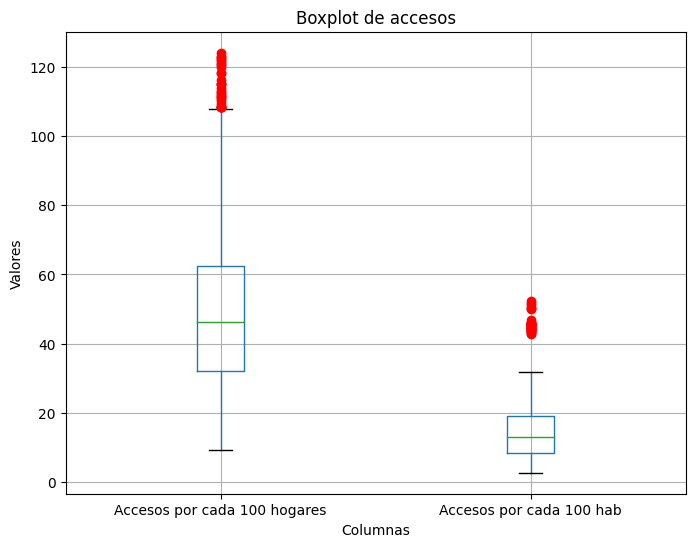

In [8]:
plt.figure(figsize=(8,6))
df_internet_penetracion.boxplot(column=['Accesos por cada 100 hogares', 'Accesos por cada 100 hab'], sym='ro')
plt.title('Boxplot de accesos')
plt.xlabel('Columnas')
plt.ylabel('Valores')

plt.show()

Viendo que encontramos varios valores outliers, decidimos investigar los registros para ambas columnas a traves del calculo de los rangos intercuartilicos.

- Columna 'Accesos por cada 100 hogares'

In [9]:
data = df_internet_penetracion[['Accesos por cada 100 hogares']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_internet_penetracion[outliers]
registros_con_outliers

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab
1,2022,4,Capital Federal,122.730000,50.350000
25,2022,3,Capital Federal,122.280000,50.220000
49,2022,2,Capital Federal,121.310000,49.873561
73,2022,1,Capital Federal,111.797863,46.014348
97,2021,4,Capital Federal,111.270026,45.848511
121,2021,3,Capital Federal,111.271055,45.900383
145,2021,2,Capital Federal,110.144402,45.487190
169,2021,1,Capital Federal,108.419939,44.826990
193,2020,4,Capital Federal,108.311075,44.833968
313,2019,3,Capital Federal,112.645388,46.904771


Podemos ver que hay 30 registros con valores outliers en la columna 'Accesos por cada 100 hogares', los cuales encontramos que son todos de la Capital Federal. Esto seria un punto interesante a analizar ya que podria indicar un comportamiento sociologico en el que a mayor concentracion de gente en la ciudad puede implicar que haya mas necesidad de conexion o acceso a internet.

- Columna 'Accesos por cada 100 hab'

In [10]:
data = df_internet_penetracion[['Accesos por cada 100 hab']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_internet_penetracion[outliers]
registros_con_outliers

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab
1,2022,4,Capital Federal,122.730000,50.350000
25,2022,3,Capital Federal,122.280000,50.220000
49,2022,2,Capital Federal,121.310000,49.873561
73,2022,1,Capital Federal,111.797863,46.014348
97,2021,4,Capital Federal,111.270026,45.848511
121,2021,3,Capital Federal,111.271055,45.900383
145,2021,2,Capital Federal,110.144402,45.487190
169,2021,1,Capital Federal,108.419939,44.826990
193,2020,4,Capital Federal,108.311075,44.833968
217,2020,3,Capital Federal,107.675901,44.622743


Al igual que en la columna anterior, podemos ver que todos los registros con valores atipicos de la columna 'Accesos por cada 100 hab' se refieren a habitantes de la Capital Federal.

Realizamos un primer analisis de los datos realizando un grafico de lineas, en el que visualicemos la tendencia o el cambio de los accesos a internet a lo largo de los años.

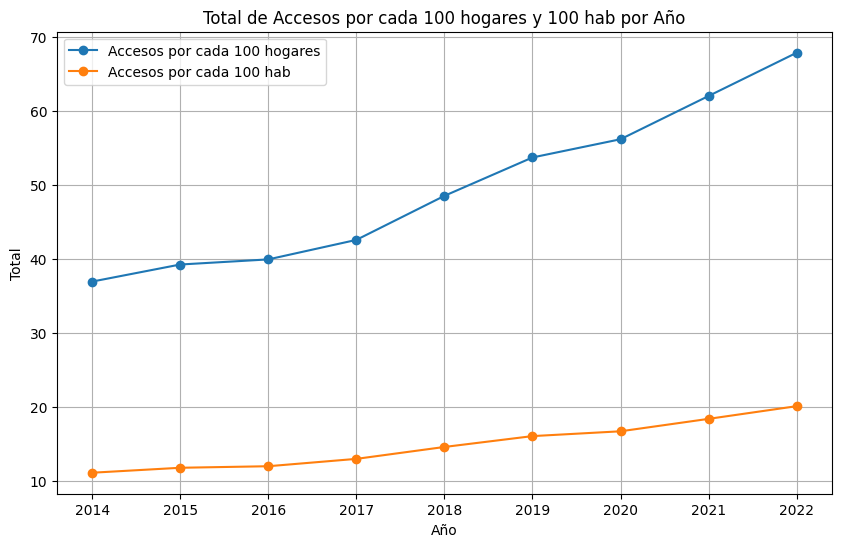

In [11]:
promedio_por_anio = df_internet_penetracion.groupby('Año').agg({'Accesos por cada 100 hogares': 'mean', 'Accesos por cada 100 hab': 'mean'})

plt.figure(figsize=(10, 6))
plt.plot(promedio_por_anio.index, promedio_por_anio['Accesos por cada 100 hogares'], label='Accesos por cada 100 hogares', marker='o')
plt.plot(promedio_por_anio.index, promedio_por_anio['Accesos por cada 100 hab'], label='Accesos por cada 100 hab', marker='o')

plt.title('Total de Accesos por cada 100 hogares y 100 hab por Año')
plt.xlabel('Año')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.show()

Se observa un notorio crecimiento en la disponibilidad de acceso a Internet en Argentina entre los años 2014 y 2022. En 2014, el número de 'Accesos por cada 100 hogares' era aproximadamente de 36, y para el año 2022, este valor ha aumentado significativamente a alrededor de 68. Además, el número de 'Accesos por cada 100 habitantes' también experimentó un incremento, pasando de aproximadamente 11 en 2014 a cerca de 20 en 2022. Estos datos reflejan un aumento en la penetración de Internet en el hogar y un mayor acceso de la población a la tecnología, lo que puede tener un impacto significativo en la sociedad.

# 2) Internet_BAF

En este segundo archivo .xlsx encontramos 2 hojas de cálculo:

1) Dial-BAf: Encontramos la cantidad de accesos a banda ancha y banda angosta que se sumaron por provincia, año y trimestre.
2) Totales: Recuentos totales de accesos a banda ancha y banda angosta a nivel nacional por año y trimestre. 

Decidimos importar unicamente la primera hoja ya que calcularemos los totales aparte.

In [12]:
df_internet_baf = pd.read_excel('./Sources/2- Internet_BAF.xlsx', sheet_name='Dial-BAf')

In [13]:
df_internet_baf

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,4788466,6199.0,4794665
1,2022,4,Capital Federal,1549781,2145.0,1551926
2,2022,4,Catamarca,70908,1.0,70909
3,2022,4,Chaco,143658,5.0,143663
4,2022,4,Chubut,167855,904.0,168759
...,...,...,...,...,...,...
859,2014,1,Santa Cruz,26304,460.0,26764
860,2014,1,Santa Fe,506000,612.0,506612
861,2014,1,Santiago Del Estero,37124,9.0,37133
862,2014,1,Tierra Del Fuego,27272,766.0,28038


Eliminamos la columna 'Total' ya que se calculara en el posterior analisis

In [14]:
df_internet_baf = df_internet_baf.drop(columns=['Total'], axis=1)

## EDA

Analizamos si existen datos vacíos o nulos.

In [15]:
df_internet_baf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 33.9+ KB


Encontramos que en la columna 'Dial up' hay 2 registros nulos, los revisamos.

In [16]:
df_internet_baf[df_internet_baf['Dial up'].isnull()]

,Año,Trimestre,Provincia,Banda ancha fija,Dial up
440,2018,2,Formosa,44554,NaN
445,2018,2,Misiones,106147,NaN


Se decide transformar esos valores nulos en 0 para no perjudicar los calculos. 

In [17]:
df_internet_baf['Dial up'].fillna(0, inplace=True)

In [18]:
df_internet_baf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           864 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 33.9+ KB


Analizamos si existen registros duplicados

In [19]:
df_internet_baf.duplicated().sum()

0

Analizamos los datos outliers o registros atipicos de las columnas 'Banda ancha fija' y 'Dial up'

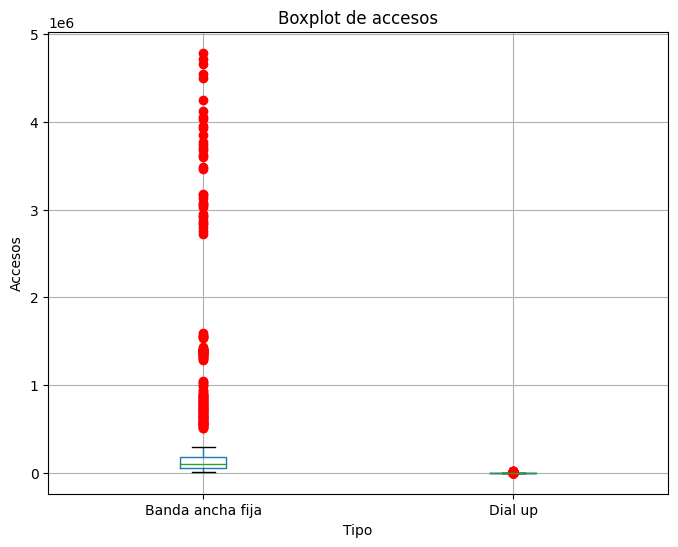

In [20]:
plt.figure(figsize=(8,6))
df_internet_baf.boxplot(column=['Banda ancha fija', 'Dial up'], sym='ro')
plt.title('Boxplot de accesos')
plt.xlabel('Tipo')
plt.ylabel('Accesos')

plt.show()

In [21]:
data = df_internet_baf[['Banda ancha fija']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_internet_baf[outliers]
registros_con_outliers

,Año,Trimestre,Provincia,Banda ancha fija,Dial up
0,2022,4,Buenos Aires,4788466,6199.0
1,2022,4,Capital Federal,1549781,2145.0
5,2022,4,Córdoba,1049592,68.0
20,2022,4,Santa Fe,887581,110.0
24,2022,3,Buenos Aires,4715469,6199.0
...,...,...,...,...,...
836,2014,2,Santa Fe,511753,605.0
840,2014,1,Buenos Aires,2725732,14144.0
841,2014,1,Capital Federal,1289204,10714.0
845,2014,1,Córdoba,566705,205.0


Como primer analisis, vemos que las principales provincias que tienen crecimientos exponenciales en sus accesos a internet por banda ancha fija son Buenos Aires, Capital Federal, Santa Fe y Cordoba. Esto se puede deber a que son las principales provincias con mayor concentracion de personas en el pais, además de que son las capitales con mayor crecimiento educacional ya que son los centros universitarios mas grandes del país.

In [22]:
data = df_internet_baf[['Dial up']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_internet_baf[outliers]
registros_con_outliers

,Año,Trimestre,Provincia,Banda ancha fija,Dial up
0,2022,4,Buenos Aires,4788466,6199.0
1,2022,4,Capital Federal,1549781,2145.0
24,2022,3,Buenos Aires,4715469,6199.0
25,2022,3,Capital Federal,1545534,2145.0
48,2022,2,Buenos Aires,4660984,6199.0
...,...,...,...,...,...
840,2014,1,Buenos Aires,2725732,14144.0
841,2014,1,Capital Federal,1289204,10714.0
844,2014,1,Chubut,68205,2016.0
852,2014,1,Mendoza,164084,1761.0


Por otro lado, vemos que las provincias con mayores accesos a internet a través de Dial up en los comienzos fueron Neuquén, Mendoza y Chubut, además de Buenos Aires y Capital Federal. Se podría analizar la relación que tienen estas provincias con el desarrollo de los pozos petroleros y, por ende, las provincias con mayor poder adquisitivo. 

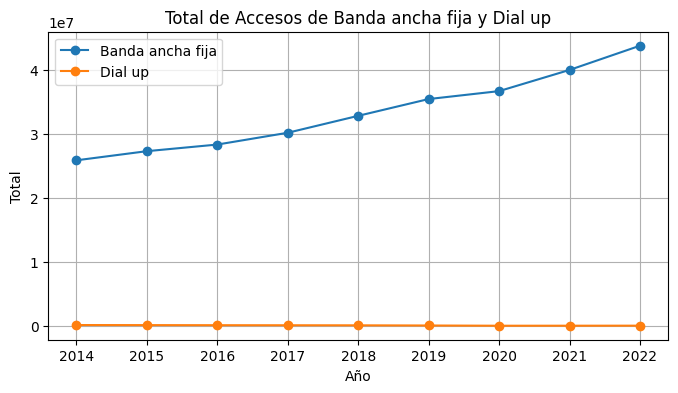

In [23]:
promedio_por_anio_baf = df_internet_baf.groupby('Año').agg({'Banda ancha fija': 'sum', 'Dial up': 'sum'})

plt.figure(figsize=(8, 4))
plt.plot(promedio_por_anio_baf.index, promedio_por_anio_baf['Banda ancha fija'], label='Banda ancha fija', marker='o')
plt.plot(promedio_por_anio_baf.index, promedio_por_anio_baf['Dial up'], label='Dial up', marker='o')

plt.title('Total de Accesos de Banda ancha fija y Dial up')
plt.xlabel('Año')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.show()

Basandonos en el gráfico podemos ver que hay:

- Un crecimiento del acceso a la banda ancha fija: esto es una señal positiva de que cada vez más personas están optando por conexiones de mayor velocidad y calidad, lo que podría deberse a una mayor disponibilidad de infraestructura de banda ancha y una mayor demanda de servicios de Internet de alta velocidad.

- Una disminución de las conexiones Dial-up: esto es esperado y se puede ver también como es una tendencia a nivel mundial. Las conexiones Dial-up suelen ser más lentas y menos eficientes que las conexiones de banda ancha, por lo que es natural que disminuyan con el tiempo a medida que las personas buscan alternativas más rápidas y eficientes.

- Una brecha significativa entre banda ancha y Dial-up: esto sugiere que la mayoría de las personas han adoptado tecnologías de Internet más avanzadas. La banda ancha ofrece velocidades más rápidas, mejor capacidad de carga y descarga, y es más adecuada para las necesidades actuales de navegación web, transmisión de medios y trabajo en línea.

# 3) Internet_Accesos_por_tecnología

En este archivo encontramos las siguientes hojas de cálculo:

- Totales: en donde vemos los totales de la cantidad de accesos a internet según la tecnología, por año y trimestre.
- Accesos Por Tecnología: en donde vemos la cantidad de accesos a internet según la tecnología, la provincia, el año y el trimestre. 

En este caso encontramos que para el año 2019, se especifica que los totales no coinciden con la división por provincias ya que se incorporó información que no contiene apertura a nivel geográfico. Para este trabajo se decide utilizar únicamente la información que especifica por provincia.

In [24]:
df_accesos_tecno = pd.read_excel('./Sources/3- Internet_Accesos-por-tecnologia.xlsx', sheet_name='Accesos Por Tecnología')

In [25]:
df_accesos_tecno

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,2022,4,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0,4794665.0,NaN,NaN,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0,4794665.0
1,2022,4,Capital Federal,138753.0,1238196.0,138548.0,4603.0,31826.0,1551926.0,NaN,NaN,Capital Federal,138753.0,1238196.0,138548.0,4603.0,31826.0,1551926.0
2,2022,4,Catamarca,8952.0,10998.0,47337.0,1379.0,2243.0,70909.0,NaN,NaN,Catamarca,8952.0,10998.0,47337.0,1379.0,2243.0,70909.0
3,2022,4,Chaco,24582.0,61265.0,47285.0,7957.0,2574.0,143663.0,NaN,NaN,Chaco,24582.0,61265.0,47285.0,7957.0,2574.0,143663.0
4,2022,4,Chubut,45450.0,73923.0,9815.0,30721.0,8850.0,168759.0,NaN,NaN,Chubut,45450.0,73923.0,9815.0,30721.0,8850.0,168759.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
863,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vemos que en este DataFrame tenemos ciertas columnas llamadas 'Unnamed' que no contienen informacion, o que la informacion que contiene es repetida, por lo que decidimos eliminarla. Ademas, eliminamos la columna 'Total' ya que se calculara en el posterior analisis.

In [26]:
df_accesos_tecno = df_accesos_tecno.drop(columns=['Total', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'], axis=1)

In [27]:
df_accesos_tecno

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
0,2022,4,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0
1,2022,4,Capital Federal,138753.0,1238196.0,138548.0,4603.0,31826.0
2,2022,4,Catamarca,8952.0,10998.0,47337.0,1379.0,2243.0
3,2022,4,Chaco,24582.0,61265.0,47285.0,7957.0,2574.0
4,2022,4,Chubut,45450.0,73923.0,9815.0,30721.0,8850.0
...,...,...,...,...,...,...,...,...
861,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0
862,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0
863,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0
864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tambien encontramos que los ultimos 2 registros del DataFrame no contienen informacion, o se encuentra la aclaracion acerca de los datos faltantes de 2019 para la hora de hacer los totales, por lo que decidimos eliminarlas. 

In [28]:
df_accesos_tecno = df_accesos_tecno.iloc[:-2]

In [29]:
df_accesos_tecno

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
0,2022,4,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0
1,2022,4,Capital Federal,138753.0,1238196.0,138548.0,4603.0,31826.0
2,2022,4,Catamarca,8952.0,10998.0,47337.0,1379.0,2243.0
3,2022,4,Chaco,24582.0,61265.0,47285.0,7957.0,2574.0
4,2022,4,Chubut,45450.0,73923.0,9815.0,30721.0,8850.0
...,...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,18927.0,100.0,381.0,4092.0,3264.0
860,2014,1,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0
861,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0
862,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0


Vemos que la columna 'Año' tiene en el valor 2019 un * por lo que decidimos eliminarlo.

Para esto creamos la funcion quitar_asterisco asi podemos utilizarla tanto para la columna 'Año' como para la columna 'Trimestre'

In [30]:
def quitar_asterisco(celda):
    if pd.notna(celda):
        return str(celda).rstrip('*')
    else:
        return celda

Aplicamos la funcion a las columnas

In [31]:
df_accesos_tecno['Año'] = df_accesos_tecno['Año'].apply(quitar_asterisco)

df_accesos_tecno['Trimestre'] = df_accesos_tecno['Trimestre'].apply(quitar_asterisco)

C:\Users\natiq\AppData\Local\Temp\ipykernel_6532\2067188137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accesos_tecno['Año'] = df_accesos_tecno['Año'].apply(quitar_asterisco)
C:\Users\natiq\AppData\Local\Temp\ipykernel_6532\2067188137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accesos_tecno['Trimestre'] = df_accesos_tecno['Trimestre'].apply(quitar_asterisco)


Modificamos el tipo de dato de ambas columnas por enteros

In [32]:
df_accesos_tecno['Año'] = df_accesos_tecno['Año'].astype(int)
df_accesos_tecno['Trimestre'] = df_accesos_tecno['Trimestre'].astype(int)

C:\Users\natiq\AppData\Local\Temp\ipykernel_6532\1802829196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accesos_tecno['Año'] = df_accesos_tecno['Año'].astype(int)
C:\Users\natiq\AppData\Local\Temp\ipykernel_6532\1802829196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accesos_tecno['Trimestre'] = df_accesos_tecno['Trimestre'].astype(int)


## EDA

Analizamos si existen datos vacíos o nulos.

In [33]:
df_accesos_tecno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           864 non-null    int32  
 1   Trimestre     864 non-null    int32  
 2   Provincia     864 non-null    object 
 3   ADSL          864 non-null    float64
 4   Cablemodem    864 non-null    float64
 5   Fibra óptica  864 non-null    float64
 6   Wireless      864 non-null    float64
 7   Otros         864 non-null    float64
dtypes: float64(5), int32(2), object(1)
memory usage: 47.4+ KB


Vemos que no existen valores vacios o nulos, por lo que pasamos a evaluar si existen registros duplicados

In [34]:
df_accesos_tecno.duplicated().sum()

0

Analizamos los registros atipicos o outliers de las columnas 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless' y 'Otros'

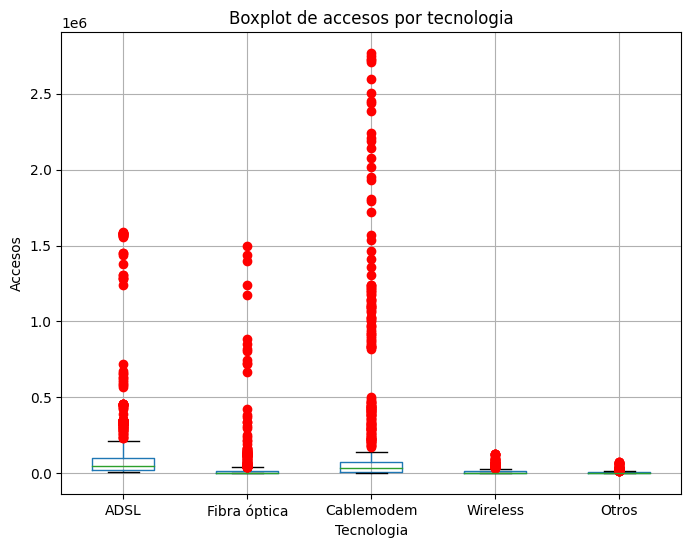

In [35]:
plt.figure(figsize=(8,6))
df_accesos_tecno.boxplot(column=['ADSL', 'Fibra óptica', 'Cablemodem','Wireless', 'Otros'], sym='ro')
plt.title('Boxplot de accesos por tecnologia')
plt.xlabel('Tecnologia')
plt.ylabel('Accesos')

plt.show()

Separamos las tecnologías Wireless y Otros para poder ver mejor el gráfico.

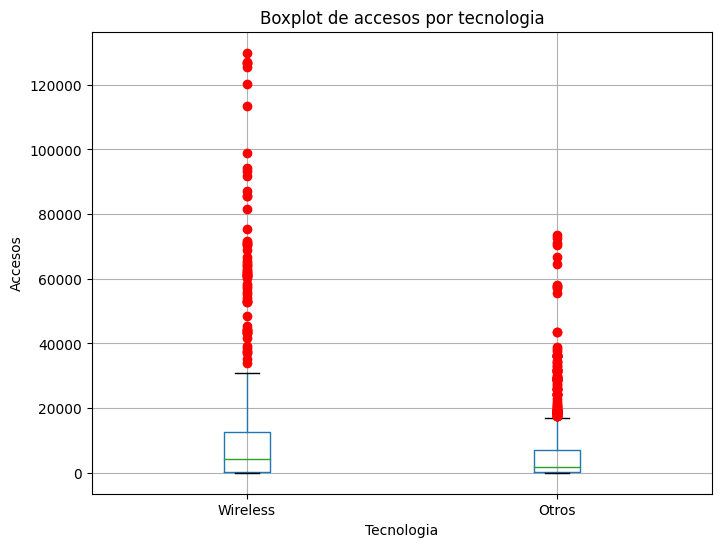

In [36]:
plt.figure(figsize=(8,6))
df_accesos_tecno.boxplot(column=['Wireless', 'Otros'], sym='ro')
plt.title('Boxplot de accesos por tecnologia')
plt.xlabel('Tecnologia')
plt.ylabel('Accesos')

plt.show()

Encontramos un monton de valores atipicos o fuera del rango intercuartil para todas las tecnologías.
Procedemos a investigar los registros con dichos valores.

In [37]:
data = df_accesos_tecno[['ADSL']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_accesos_tecno[outliers]
registros_con_outliers

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
0,2022,4,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0
24,2022,3,Buenos Aires,339648.0,2748325.0,1436433.0,126846.0,70416.0
48,2022,2,Buenos Aires,350652.0,2719613.0,1399043.0,126847.0,71028.0
72,2022,1,Buenos Aires,392045.0,2728865.0,1242121.0,125521.0,66872.0
96,2021,4,Buenos Aires,426325.0,2706506.0,1176024.0,126887.0,73415.0
...,...,...,...,...,...,...,...,...
836,2014,2,Santa Fe,324101.0,178495.0,3085.0,6041.0,636.0
840,2014,1,Buenos Aires,1567685.0,1000879.0,120960.0,16528.0,33824.0
841,2014,1,Capital Federal,445569.0,820161.0,17767.0,1866.0,14555.0
845,2014,1,Córdoba,336841.0,225769.0,347.0,3585.0,368.0


In [38]:
data = df_accesos_tecno[['Cablemodem']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_accesos_tecno[outliers]
registros_con_outliers

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
0,2022,4,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0
1,2022,4,Capital Federal,138753.0,1238196.0,138548.0,4603.0,31826.0
5,2022,4,Córdoba,152265.0,456947.0,367393.0,61631.0,11424.0
20,2022,4,Santa Fe,163621.0,412157.0,248558.0,44113.0,19242.0
24,2022,3,Buenos Aires,339648.0,2748325.0,1436433.0,126846.0,70416.0
...,...,...,...,...,...,...,...,...
836,2014,2,Santa Fe,324101.0,178495.0,3085.0,6041.0,636.0
840,2014,1,Buenos Aires,1567685.0,1000879.0,120960.0,16528.0,33824.0
841,2014,1,Capital Federal,445569.0,820161.0,17767.0,1866.0,14555.0
845,2014,1,Córdoba,336841.0,225769.0,347.0,3585.0,368.0


Así como vimos anteriormente, en general, los valores atípicos o outliers para estas primeras dos columnas se refieren a provincias como Buenos Aires, Capital Federal, Cordoba, Santa Fe, que son las capitales con mayor concentración poblacional, con mayor poder adquisitivo, con un claro mayor nivel educativo y además son provincias productoras de servicios, por lo que podemos inferir que requieren mayor conectividad en general. 

In [39]:
data = df_accesos_tecno[['Fibra óptica']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_accesos_tecno[outliers]
registros_con_outliers

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
0,2022,4,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0
1,2022,4,Capital Federal,138753.0,1238196.0,138548.0,4603.0,31826.0
2,2022,4,Catamarca,8952.0,10998.0,47337.0,1379.0,2243.0
3,2022,4,Chaco,24582.0,61265.0,47285.0,7957.0,2574.0
5,2022,4,Córdoba,152265.0,456947.0,367393.0,61631.0,11424.0
...,...,...,...,...,...,...,...,...
744,2015,1,Buenos Aires,1583135.0,1096836.0,134177.0,18754.0,28940.0
768,2014,4,Buenos Aires,1575978.0,1070135.0,120528.0,17728.0,32038.0
792,2014,3,Buenos Aires,1562533.0,1110628.0,124474.0,20049.0,31881.0
816,2014,2,Buenos Aires,1568881.0,1025490.0,120008.0,17020.0,33147.0


In [40]:
data = df_accesos_tecno[['Wireless']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_accesos_tecno[outliers]
registros_con_outliers

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
0,2022,4,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0
5,2022,4,Córdoba,152265.0,456947.0,367393.0,61631.0,11424.0
18,2022,4,San Luis,6283.0,43460.0,3409.0,81557.0,511.0
20,2022,4,Santa Fe,163621.0,412157.0,248558.0,44113.0,19242.0
24,2022,3,Buenos Aires,339648.0,2748325.0,1436433.0,126846.0,70416.0
...,...,...,...,...,...,...,...,...
426,2018,3,San Luis,11096.0,7784.0,368.0,52859.0,2314.0
432,2018,2,Buenos Aires,1450203.0,1807868.0,143626.0,71256.0,27746.0
456,2018,1,Buenos Aires,1452061.0,1793884.0,133928.0,64379.0,31194.0
480,2017,4,Buenos Aires,1241172.0,1718013.0,131181.0,60082.0,31448.0


In [41]:
data = df_accesos_tecno[['Otros']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_accesos_tecno[outliers]
registros_con_outliers

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
0,2022,4,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0
1,2022,4,Capital Federal,138753.0,1238196.0,138548.0,4603.0,31826.0
15,2022,4,Río Negro,34043.0,48401.0,43958.0,16277.0,19413.0
20,2022,4,Santa Fe,163621.0,412157.0,248558.0,44113.0,19242.0
24,2022,3,Buenos Aires,339648.0,2748325.0,1436433.0,126846.0,70416.0
...,...,...,...,...,...,...,...,...
744,2015,1,Buenos Aires,1583135.0,1096836.0,134177.0,18754.0,28940.0
768,2014,4,Buenos Aires,1575978.0,1070135.0,120528.0,17728.0,32038.0
792,2014,3,Buenos Aires,1562533.0,1110628.0,124474.0,20049.0,31881.0
816,2014,2,Buenos Aires,1568881.0,1025490.0,120008.0,17020.0,33147.0


En estos últimos casos podemos ver que Buenos Aires fue pionera en la implementación de tecnologías como Fibra Optica o Wireless. 

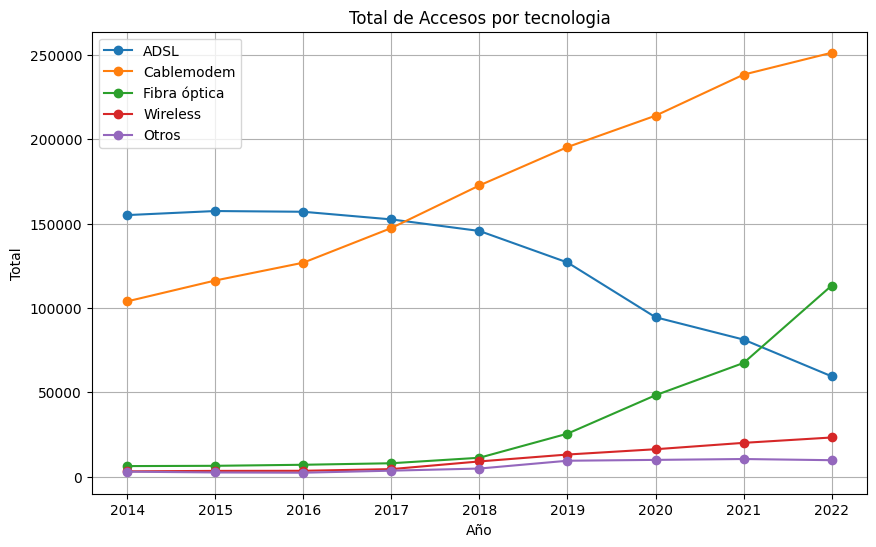

In [42]:
promedio_por_anio = df_accesos_tecno.groupby('Año').agg({'ADSL': 'mean', 'Cablemodem': 'mean', 'Fibra óptica': 'mean', 'Wireless': 'mean', 'Otros': 'mean'})

plt.figure(figsize=(10, 6))
plt.plot(promedio_por_anio.index, promedio_por_anio['ADSL'], label='ADSL', marker='o')
plt.plot(promedio_por_anio.index, promedio_por_anio['Cablemodem'], label='Cablemodem', marker='o')
plt.plot(promedio_por_anio.index, promedio_por_anio['Fibra óptica'], label='Fibra óptica', marker='o')
plt.plot(promedio_por_anio.index, promedio_por_anio['Wireless'], label='Wireless', marker='o')
plt.plot(promedio_por_anio.index, promedio_por_anio['Otros'], label='Otros', marker='o')

plt.title('Total de Accesos por tecnologia')
plt.xlabel('Año')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.show()

Podemos realizar algunas observaciones del grafico:

- El aumento en la adopción de Cablemodem a lo largo de los años podría deberse a varias razones. Una posible explicación es que las redes de cable han mejorado su infraestructura y capacidad, lo que ha hecho que el servicio sea más atractivo para los usuarios. Además, es posible que los proveedores de servicios de Internet hayan promocionado activamente el Cablemodem como una opción de alta velocidad.

- La sdsminución notable en el uso de ADSL podría estar relacionada con la obsolescencia de esta tecnología en comparación con las opciones más rápidas, como el Cablemodem y la Fibra óptica. La baja velocidad y la limitada capacidad de ADSL pueden haber llevado a una migración de los usuarios hacia tecnologías más avanzadas.

- El aumento en la adopción de Fibra óptica a partir de 2018 podría explicarse por la expansión de la infraestructura de fibra óptica en ese período. Las ventajas de velocidad y estabilidad de la fibra óptica pueden haber motivado a más usuarios a realizar la transición a esta tecnología.

- La estabilidad y ligero aumento en el uso de Wireless puede deberse al hecho de que esta tecnología es ampliamente utilizada para conexiones móviles, como redes 4G y 5G, y no necesariamente para conexiones en el hogar. El ligero aumento en los últimos años podría deberse a una mayor demanda de servicios móviles de alta velocidad.

# 4) historico_velocidad_internet

En este archivo .xlsx podemos encontrar las siguientes hojas de calculo:

- Velocidad % por prov: Encontramos información acerca de la cantidad de Mbps (Media de bajada) según la provincia, año y trimestre.
- Totales: contiene información acerca de los totales nacionales por año y trimestre. 

Se decide descargar únicamente la hoja Velocidad % por prov ya que los totales los calcularemos luego. 

In [43]:
df_historico_vel = pd.read_excel('./Sources/4- historico_velocidad_internet.xlsx', sheet_name='Velocidad % por prov')

In [44]:
df_historico_vel

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.000000
1,2022,4,Capital Federal,182.860000
2,2022,4,Catamarca,83.330000
3,2022,4,Chaco,104.020000
4,2022,4,Chubut,15.920000
...,...,...,...,...
859,2014,1,Santa Cruz,3.315991
860,2014,1,Santa Fe,3.147407
861,2014,1,Santiago Del Estero,2.949472
862,2014,1,Tierra Del Fuego,3.446888


## EDA

Comenzamos analizando si hay valores nulos o vacios

In [45]:
df_historico_vel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


Analizamos si existen registros duplicados

In [46]:
df_historico_vel.duplicated().sum()

0

Analizamos los valores atipicos o outliers

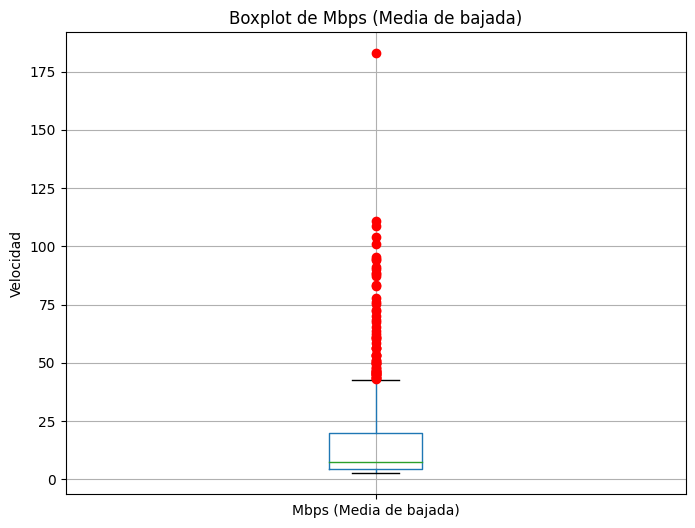

In [47]:
plt.figure(figsize=(8,6))
df_historico_vel.boxplot(column=['Mbps (Media de bajada)'], sym='ro')
plt.title('Boxplot de Mbps (Media de bajada)')
plt.ylabel('Velocidad')

plt.show()

In [48]:
data = df_historico_vel[['Mbps (Media de bajada)']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_historico_vel[outliers]
registros_con_outliers

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.000000
1,2022,4,Capital Federal,182.860000
2,2022,4,Catamarca,83.330000
3,2022,4,Chaco,104.020000
5,2022,4,Córdoba,108.770000
...,...,...,...,...
240,2020,2,Buenos Aires,45.661974
241,2020,2,Capital Federal,60.484497
264,2020,1,Buenos Aires,45.181288
265,2020,1,Capital Federal,58.705683


Vemos que la alta velocidad de bajada comienza recien en 2020 en Capital Federal y Buenos Aires y luego recien en 2022 comienza el crecimiento en el resto de las provincias. Esto se puede deber al hecho de que las áreas metropolitanas, como Capital Federal y Buenos Aires, suelen ser prioritarias para las inversiones en infraestructura de telecomunicaciones debido a su alta densidad de población y la demanda de servicios de alta velocidad, ademas de que la demanda de servicios de Internet de alta velocidad es generalmente más alta debido a la concentración de empresas, hogares y usuarios.

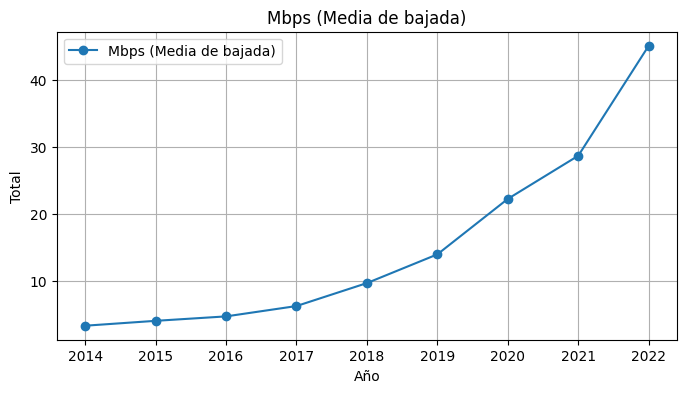

In [49]:
promedio_por_anio = df_historico_vel.groupby('Año').agg({'Mbps (Media de bajada)': 'mean'})

plt.figure(figsize=(8, 4))
plt.plot(promedio_por_anio.index, promedio_por_anio['Mbps (Media de bajada)'], label='Mbps (Media de bajada)', marker='o')

plt.title('Mbps (Media de bajada)')
plt.xlabel('Año')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.show()

La evolución de la media de bajada de la velocidad de Internet a nivel nacional ha experimentado un incremento notable en los últimos 4 años. Este aumento en la velocidad de descarga refleja una tendencia positiva en el acceso a Internet en el país, lo que significa que los usuarios tienen la capacidad de descargar datos y contenido de manera más rápida y eficiente. Este aumento puede estar relacionado con inversiones en infraestructura, avances tecnológicos y una mayor demanda de servicios de alta velocidad por parte de los usuarios. En general, esta tendencia positiva en la velocidad de Internet es un indicio de un mejor acceso a recursos en línea y una experiencia de navegación más fluida para los usuarios en todo el país.

# 5) Internet_Accesos_por_velocidad

En este archivo .xlsx encontramos las siguientes hojas de calculo:

- Accesos por velocidad: informacion sobre la cantidad de accesos segun la velocidad de descarga, la provincia, año y trimestre.
- Totales: informacion sobre los totales nacionales segun la velocidad de descarla, la provincia, año y trimestre.

Decidimos importar unicamente la hoja 'Accesos por velocidad' ya que calcularemos los totales luego. 

!!! Aclaración sobre el cálculo de la velocidad promedio de bajada de Internet fijo en Argentina

Hasta el tercer trimestre de 2017 los operadores del servicio de Internet fijo reportaban a ENACOM (antes AFTIC y CNC) el número de accesos entre los siguientes rangos de velocidad:

- Hasta 512 kbps
- Entre 512 kbps y 1 Mbps
- Entre 1 Mbps y 6 Mbps
- Entre 6 Mbps y 10 Mbps
- Entre 10 Mbps y 20 Mbps
- Entre 20 Mbps y 30 Mbps
- Más de 30 Mbps

Con el fin de contar con mejor información del mercado y siguiendo metodologías internacionales de medición desde el cuarto trimestre de 2017 se solicita el número de accesos por Mbps.

En consecuencia y ante el desconocimiento exacto de la distribución de los accesos entre los rangos, la velocidad promedio (VP) está calculada usando el punto medio de cada rango como muestra la siguiente fórmula: 

VP = (0,512*AR1 + 0,7512*AR2 + 3,5*AR3 + 8*AR4 + 15*AR5 + 25*AR6 + 30*AR7)/Total de accesos reportados

Donde AR1 es el total de accesos reportados para el primer rango (Hasta 512 kbps); AR2 es el total de accesos reportados para el segundo rango (Entre 512 kbps y 1 Mbps) y así sucesivamente.

Desde el cuarto trimestre de 2017, VP se calcula como el promedio de las velocidades unitarias en Mbps ponderadas por el número de accesos reportados para cada velocidad.

In [50]:
df_accesos_vel = pd.read_excel('./Sources/5- Internet_Accesos-por-velocidad.xlsx', sheet_name='Accesos por velocidad')

In [51]:
df_accesos_vel

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28934.0,23347.0,259866.0,281550.0,244555.0,98670.0,3760109.0,97634.0,4794665.0
1,2022,4,Capital Federal,516.0,5096.0,31320.0,64653.0,36336.0,8116.0,1299117.0,106772.0,1551926.0
2,2022,4,Catamarca,71.0,315.0,2716.0,5028.0,4638.0,3122.0,52739.0,2280.0,70909.0
3,2022,4,Chaco,461.0,771.0,16067.0,17846.0,6704.0,3039.0,94866.0,3909.0,143663.0
4,2022,4,Chubut,109.0,1614.0,46457.0,31007.0,34728.0,15770.0,19048.0,20026.0,168759.0
...,...,...,...,...,...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,161.0,1625.0,24972.0,1.0,1.0,0.0,0.0,0.0,26760.0
860,2014,1,Santa Fe,8456.0,124468.0,345225.0,20328.0,6845.0,23.0,668.0,0.0,506013.0
861,2014,1,Santiago Del Estero,1234.0,10531.0,22817.0,2422.0,109.0,0.0,0.0,0.0,37113.0
862,2014,1,Tierra Del Fuego,12.0,607.0,30902.0,6.0,0.0,0.0,0.0,0.0,31527.0


## EDA

Comenzamos analizando si hay valores vacios o nulos

In [52]:
df_accesos_vel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  864 non-null    int64  
 1   Trimestre            864 non-null    int64  
 2   Provincia            864 non-null    object 
 3   HASTA 512 kbps       864 non-null    float64
 4   + 512 Kbps - 1 Mbps  864 non-null    float64
 5   + 1 Mbps - 6 Mbps    864 non-null    float64
 6   + 6 Mbps - 10 Mbps   864 non-null    float64
 7   + 10 Mbps - 20 Mbps  864 non-null    float64
 8   + 20 Mbps - 30 Mbps  864 non-null    float64
 9   + 30 Mbps            864 non-null    float64
 10  OTROS                858 non-null    float64
 11  Total                864 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 81.1+ KB


Analizamos si existen registros duplicados

In [53]:
df_accesos_vel.duplicated().sum()

0

Analizamos registros atipicos o outliers

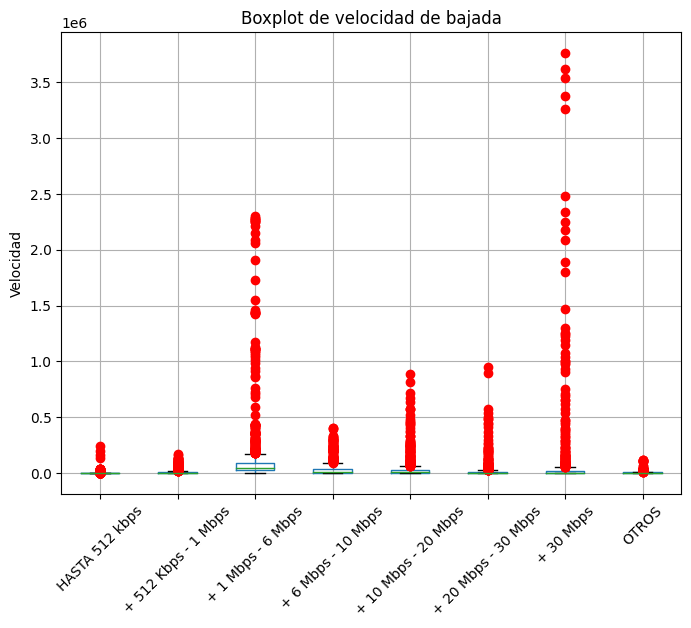

In [54]:
plt.figure(figsize=(8,6))
df_accesos_vel.boxplot(column=['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS'], sym='ro')
plt.title('Boxplot de velocidad de bajada')
plt.xticks(rotation=45)
plt.ylabel('Velocidad')

plt.show()

In [55]:
data = df_accesos_vel[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_accesos_vel[outliers]
registros_con_outliers

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28934.0,23347.0,259866.0,281550.0,244555.0,98670.0,3760109.0,97634.0,4794665.0
1,2022,4,Capital Federal,516.0,5096.0,31320.0,64653.0,36336.0,8116.0,1299117.0,106772.0,1551926.0
3,2022,4,Chaco,461.0,771.0,16067.0,17846.0,6704.0,3039.0,94866.0,3909.0,143663.0
4,2022,4,Chubut,109.0,1614.0,46457.0,31007.0,34728.0,15770.0,19048.0,20026.0,168759.0
5,2022,4,Córdoba,99.0,9929.0,143686.0,108195.0,63120.0,20691.0,686330.0,17610.0,1049660.0
...,...,...,...,...,...,...,...,...,...,...,...,...
854,2014,1,Neuquén,4133.0,987.0,77148.0,84.0,1582.0,2.0,22.0,0.0,83958.0
855,2014,1,Río Negro,4670.0,4618.0,84304.0,73.0,1062.0,1.0,8.0,0.0,94736.0
856,2014,1,Salta,53.0,19677.0,64061.0,7192.0,314.0,0.0,0.0,0.0,91297.0
860,2014,1,Santa Fe,8456.0,124468.0,345225.0,20328.0,6845.0,23.0,668.0,0.0,506013.0


Dependiendo de cada columna de velocidad de bajada podemos identificar desde problemas de conectividad, que pueden estar debidos a falta de inversiones en la infraestructura de la provincia, areas con problemas de conectividad unicos, tambien podriamos analizar el comportamiento de los usuarios en la adopcion de nuevas tecnologias, por ejemplo, un aumento en las conexiones de alta velocidad podría estar relacionado con una mayor demanda de streaming de video o trabajo en línea.

# Unimos los datasets por provincias

Vemos que todos los datasets estan armados bajo la misma estructura por lo que decidimos unirlos para que queden todos en uno.

Esto lo vamos a realizar a traves de un merge bajo las columnas de año, trimestre y provincia.

In [56]:
datos_lista = [df_internet_penetracion, df_internet_baf, df_accesos_tecno, df_historico_vel, df_accesos_vel]

df_internet_argentina = datos_lista[0]

for df in datos_lista[1:]:
    df_internet_argentina = df_internet_argentina.merge(df, on=['Año', 'Trimestre', 'Provincia'], how='inner')

df_internet_argentina

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab,Banda ancha fija,Dial up,ADSL,Cablemodem,Fibra óptica,...,Mbps (Media de bajada),HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,78.940000,26.720000,4788466,6199.0,325908.0,2767247.0,1499149.0,...,111.000000,28934.0,23347.0,259866.0,281550.0,244555.0,98670.0,3760109.0,97634.0,4794665.0
1,2022,4,Capital Federal,122.730000,50.350000,1549781,2145.0,138753.0,1238196.0,138548.0,...,182.860000,516.0,5096.0,31320.0,64653.0,36336.0,8116.0,1299117.0,106772.0,1551926.0
2,2022,4,Catamarca,65.770000,16.730000,70908,1.0,8952.0,10998.0,47337.0,...,83.330000,71.0,315.0,2716.0,5028.0,4638.0,3122.0,52739.0,2280.0,70909.0
3,2022,4,Chaco,43.620000,11.660000,143658,5.0,24582.0,61265.0,47285.0,...,104.020000,461.0,771.0,16067.0,17846.0,6704.0,3039.0,94866.0,3909.0,143663.0
4,2022,4,Chubut,85.570000,26.230000,167855,904.0,45450.0,73923.0,9815.0,...,15.920000,109.0,1614.0,46457.0,31007.0,34728.0,15770.0,19048.0,20026.0,168759.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,28.939093,8.677327,26304,460.0,18927.0,100.0,381.0,...,3.315991,161.0,1625.0,24972.0,1.0,1.0,0.0,0.0,0.0,26760.0
860,2014,1,Santa Fe,47.847663,15.077801,506000,612.0,322662.0,174296.0,3059.0,...,3.147407,8456.0,124468.0,345225.0,20328.0,6845.0,23.0,668.0,0.0,506013.0
861,2014,1,Santiago Del Estero,16.309924,4.058899,37124,9.0,32567.0,3598.0,19.0,...,2.949472,1234.0,10531.0,22817.0,2422.0,109.0,0.0,0.0,0.0,37113.0
862,2014,1,Tierra Del Fuego,63.965926,19.104921,27272,766.0,21618.0,2837.0,648.0,...,3.446888,12.0,607.0,30902.0,6.0,0.0,0.0,0.0,0.0,31527.0


Le cambiamos el nombre a la columna 'Total' por 'Total accesos'

In [57]:
df_internet_argentina = df_internet_argentina.rename(columns={'Total': 'Total accesos'})

Estandarizamos las columnas numéricas para redondear a 2 decimales y que sean de tipo float

In [58]:
listado_de_columnas = df_internet_argentina.columns
listado_de_columnas = listado_de_columnas[3:] 

df_internet_argentina[listado_de_columnas] = df_internet_argentina[listado_de_columnas].round(2)

In [59]:
df_internet_argentina

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab,Banda ancha fija,Dial up,ADSL,Cablemodem,Fibra óptica,...,Mbps (Media de bajada),HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total accesos
0,2022,4,Buenos Aires,78.94,26.72,4788466,6199.0,325908.0,2767247.0,1499149.0,...,111.00,28934.0,23347.0,259866.0,281550.0,244555.0,98670.0,3760109.0,97634.0,4794665.0
1,2022,4,Capital Federal,122.73,50.35,1549781,2145.0,138753.0,1238196.0,138548.0,...,182.86,516.0,5096.0,31320.0,64653.0,36336.0,8116.0,1299117.0,106772.0,1551926.0
2,2022,4,Catamarca,65.77,16.73,70908,1.0,8952.0,10998.0,47337.0,...,83.33,71.0,315.0,2716.0,5028.0,4638.0,3122.0,52739.0,2280.0,70909.0
3,2022,4,Chaco,43.62,11.66,143658,5.0,24582.0,61265.0,47285.0,...,104.02,461.0,771.0,16067.0,17846.0,6704.0,3039.0,94866.0,3909.0,143663.0
4,2022,4,Chubut,85.57,26.23,167855,904.0,45450.0,73923.0,9815.0,...,15.92,109.0,1614.0,46457.0,31007.0,34728.0,15770.0,19048.0,20026.0,168759.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,28.94,8.68,26304,460.0,18927.0,100.0,381.0,...,3.32,161.0,1625.0,24972.0,1.0,1.0,0.0,0.0,0.0,26760.0
860,2014,1,Santa Fe,47.85,15.08,506000,612.0,322662.0,174296.0,3059.0,...,3.15,8456.0,124468.0,345225.0,20328.0,6845.0,23.0,668.0,0.0,506013.0
861,2014,1,Santiago Del Estero,16.31,4.06,37124,9.0,32567.0,3598.0,19.0,...,2.95,1234.0,10531.0,22817.0,2422.0,109.0,0.0,0.0,0.0,37113.0
862,2014,1,Tierra Del Fuego,63.97,19.10,27272,766.0,21618.0,2837.0,648.0,...,3.45,12.0,607.0,30902.0,6.0,0.0,0.0,0.0,0.0,31527.0


Renombramos las columnas que se refieren a 'Otros' para una mejor identificacion.

In [60]:
df_internet_argentina = df_internet_argentina.rename(columns={'Otros': 'Otras tecnologias', 'OTROS': 'Otras velocidades'})

In [61]:
df_internet_argentina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    float64
 4   Accesos por cada 100 hab      864 non-null    float64
 5   Banda ancha fija              864 non-null    int64  
 6   Dial up                       864 non-null    float64
 7   ADSL                          864 non-null    float64
 8   Cablemodem                    864 non-null    float64
 9   Fibra óptica                  864 non-null    float64
 10  Wireless                      864 non-null    float64
 11  Otras tecnologias             864 non-null    float64
 12  Mbps (Media de bajada)        864 non-null    float64
 13  HASTA

Vemos que la columna 'Otras velocidades' contienen datos nulos, por lo que decidimos rellenarlas con el valor 0.0.

In [62]:
df_internet_argentina.fillna(0.0, inplace=True)

Descargamos el Dataset final en un archivo CSV

In [63]:
df_internet_argentina.to_csv('accesos_internet_provincias.csv', index=False)

# 6) Internet_Ingresos

En este archivo .xlsx encontramos la siguiente hojas de calculo:

- Ingresos: informacion sobre la cantidad de ingresos en miles de pesos a nivel nacional segun el año y el trimestre.

In [64]:
df_ingresos = pd.read_excel('./Sources/6- Internet_Ingresos.xlsx', sheet_name='Ingresos')

Redondeamos la columna 'Ingresos (miles de pesos)' a 2 decimales

In [65]:
df_ingresos['Ingresos (miles de pesos)'] = df_ingresos['Ingresos (miles de pesos)'].round(2)

In [66]:
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,72443482.99,Oct-Dic 2022
1,2022,3,64086784.33,Jul-Sept 2022
2,2022,2,60419500.62,Abr-Jun 2022
3,2022,1,55219313.01,Ene-Mar 2022
4,2021,4,45467887.17,Oct-Dic 2021


Eliminamos la columna 'Periodo' ya que es informacion redundante.

In [67]:
df_ingresos = df_ingresos.drop(columns=['Periodo'], axis=1)

## EDA

Revisamos si existen datos vacios o nulos

In [68]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        36 non-null     int64  
 1   Trimestre                  36 non-null     int64  
 2   Ingresos (miles de pesos)  36 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 996.0 bytes


Revisamos si hay valores duplicados

In [69]:
df_ingresos.duplicated().sum()

0

Revisamos los valores outliers o atipicos

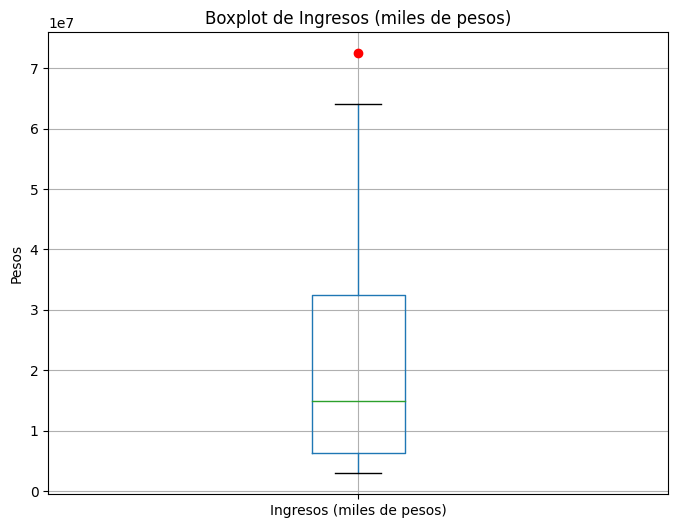

In [70]:
plt.figure(figsize=(8,6))
df_ingresos.boxplot(column=['Ingresos (miles de pesos)'], sym='ro')
plt.title('Boxplot de Ingresos (miles de pesos)')
plt.ylabel('Pesos')

plt.show()

Buscamos el dato atipico en la tabla.

In [71]:
data = df_ingresos[['Ingresos (miles de pesos)']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_ingresos[outliers]
registros_con_outliers

,Año,Trimestre,Ingresos (miles de pesos)
0,2022,4,72443482.99


Vemos que el registro que figura como outlier se refiere al ultimo trimestre del año 2022. Esto puede deberse a diversos factores como por ejemplo, un aumento en la inflacion, un aumento en la demanda de internet, etc.

## Conclusion: No utilizaremos este Dataset como información acerca del crecimiento de la industria

Tras un análisis exhaustivo de la base de datos relacionada con los ingresos de la industria del Internet en Argentina durante el período 2014 a 2022, hemos decidido no utilizarla como base para nuestro estudio por varias razones fundamentales.

En primer lugar, la falta de datos de inflación representa un obstáculo crítico para interpretar los valores en pesos argentinos. Durante este período, Argentina ha experimentado fluctuaciones significativas en su tasa de inflación, lo que significa que el valor real de los ingresos en pesos argentinos ha variado considerablemente a lo largo de los años. La falta de ajuste por inflación dificulta la comparación precisa y la interpretación de los datos, lo que compromete su utilidad para el estudio del crecimiento o decrecimiento de la industria.

Además, la base de datos carece de información detallada sobre la procedencia de los ingresos. No podemos determinar si los valores se refieren a una empresa en particular, a un subsector de la industria, o si representan el total de todos los actores del mercado. Esta ambigüedad en la fuente de los datos dificulta aún más su interpretación y su capacidad para proporcionar información relevante.

En resumen, la falta de ajuste por inflación y la ambigüedad en la procedencia de los ingresos hacen que esta base de datos sea inadecuada como base para el análisis de la industria del Internet en Argentina. En su lugar, se requiere una fuente de datos más precisa y detallada que permita una evaluación más sólida y significativa de la evolución de la industria a lo largo de los años.

Igualmente podemos utilizarla como comparación con otros servicios para ver la relación entre ellos.

In [123]:
df_ingresos.to_csv('ingresos_internet.csv', index=False)

# Internet_Accesos_por_velocidad_por_loc

En este archivo .xlsx encontramos las siguientes hojas de calculo:

- internet_Accesos_por_loc: donde encontramos informacion de la cantidad de accesos que hay por localidad y cantidad de Mbps de descarga.

In [72]:
df_accesos_por_loc = pd.read_excel('./Sources/7- Internet_Accesos-por-velocidad_por loc.xlsx', sheet_name='internet_Accesos_por_loc')

In [73]:
df_accesos_por_loc

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,950 Mbps,1000 Mbps,1024 Mbps,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6208.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3764.0
3091,TUCUMAN,Trancas,San Pedro de Colalao,90112020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,313.0
3092,TUCUMAN,Trancas,Villa de Trancas,90112030,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260.0
3093,TUCUMAN,Yerba Buena,Villa Carmela,90119020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1596.0


Primero, reemplazamos los valores NaN por 0.0 para facilitar el manejo de la tabla.

In [74]:
df_accesos_por_loc.fillna(0.0, inplace=True)

In [75]:
df_accesos_por_loc.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,950 Mbps,1000 Mbps,1024 Mbps,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6208.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0


Eliminamos las columnas innecesarias para este analisis.

In [76]:
df_accesos_por_loc = df_accesos_por_loc.drop(columns=['Link Indec', 'Total general'], axis=1)

Para poder relacionar las tablas vamos a agrupar segun la division de Mbps de la tabla anterior que es la siguiente:

- 'HASTA 512 kbps'
- '+ 512 Kbps - 1 Mbps'
- '+ 1 Mbps - 6 Mbps'
- '+ 6 Mbps - 10 Mbps'
- '+ 10 Mbps - 20 Mbps'
- '+ 20 Mbps - 30 Mbps'
- '+ 30 Mbps'

In [77]:
cols_accesos = df_accesos_por_loc.columns
cols_accesos

Index(['Provincia', 'Partido', 'Localidad', 'Otros', '0,256 Mbps',
       '0,375 Mbps', '0,5 Mbps', '0,512 Mbps', '0,625 Mbps', '0,75 Mbps',
       ...
       '540 Mbps', '600 Mbps', '680 Mbps', '700 Mbps', '800 Mbps', '850 Mbps',
       '900 Mbps', '950 Mbps', '1000 Mbps', '1024 Mbps'],
      dtype='object', length=132)

In [78]:
HASTA_512_kbps =  ['0,256 Mbps', '0,375 Mbps', '0,5 Mbps', '0,512 Mbps']
entre_512Kbps_1Mbps = ['0,625 Mbps', '0,75 Mbps']
entre_1Mbps_6Mbps = ['1 Mbps','1,25 Mbps','1,5 Mbps', '2 Mbps','2,2 Mbps','2,5 Mbps', '3 Mbps','3,3 Mbps','3,5 Mbps', '4 Mbps','4,5 Mbps', '5 Mbps', '6 Mbps']
entre_6Mbps_10Mbps = ['6,4 Mbps', '7 Mbps','7,5 Mbps', '8 Mbps', '9 Mbps', '10 Mbps']
entre_10Mbps_20Mbps = ['10,2 Mbps', '11 Mbps', '12 Mbps', '12,3 Mbps', '13 Mbps','14 Mbps', '15 Mbps', '16 Mbps','17 Mbps','18 Mbps', '20 Mbps']
entre_20Mbps_30Mbps = ['20,5 Mbps','21 Mbps','22 Mbps','23 Mbps','24 Mbps', '25 Mbps', '25,1 Mbps','25,5 Mbps','26 Mbps','27 Mbps', '30 Mbps']
MAS_30Mbps = ['31 Mbps','32 Mbps','34 Mbps','35 Mbps','36 Mbps','38 Mbps','39 Mbps', '40 Mbps','41 Mbps', '45 Mbps','46 Mbps','48 Mbps','49 Mbps','50 Mbps','50,1 Mbps','50,25 Mbps','51 Mbps','55 Mbps',	'58 Mbps', '59 Mbps','60 Mbps', '61 Mbps','62 Mbps', '64 Mbps', '65 Mbps','66 Mbps', '70 Mbps',	'75 Mbps', '78 Mbps','80 Mbps',	'83 Mbps',	'85 Mbps',	'90 Mbps','92 Mbps','95 Mbps', '100 Mbps',	'100,25 Mbps',	'110 Mbps',	'120 Mbps',	'122 Mbps',	'125 Mbps',	'126 Mbps',	'130 Mbps',	'140 Mbps', '150 Mbps',	'157 Mbps',	'158 Mbps',	'160 Mbps',	'164 Mbps',	'165 Mbps',	'180 Mbps',	'200 Mbps',	'212 Mbps',	'220 Mbps',	'225 Mbps',	'234 Mbps',	'240 Mbps',	'250 Mbps',	'256 Mbps',	'275 Mbps',	'300 Mbps',	'320 Mbps',	'325 Mbps',	'330 Mbps',	'340 Mbps',	'400 Mbps',	'450 Mbps',	'480 Mbps',	'500 Mbps',	'512 Mbps',	'520 Mbps',	'540 Mbps',	'600 Mbps',	'680 Mbps',	'700 Mbps',	'800 Mbps',	'850 Mbps',	'900 Mbps',	'950 Mbps',	'1000 Mbps', '1024 Mbps']

df_accesos_por_loc['HASTA 512 kbps'] = df_accesos_por_loc[HASTA_512_kbps].sum(axis=1)
df_accesos_por_loc['+ 512 Kbps - 1 Mbps'] = df_accesos_por_loc[entre_512Kbps_1Mbps].sum(axis=1)
df_accesos_por_loc['+ 1 Mbps - 6 Mbps'] = df_accesos_por_loc[entre_1Mbps_6Mbps].sum(axis=1)
df_accesos_por_loc['+ 6 Mbps - 10 Mbps'] = df_accesos_por_loc[entre_6Mbps_10Mbps].sum(axis=1)
df_accesos_por_loc['+ 10 Mbps - 20 Mbps'] = df_accesos_por_loc[entre_10Mbps_20Mbps].sum(axis=1)
df_accesos_por_loc['+ 20 Mbps - 30 Mbps'] = df_accesos_por_loc[entre_20Mbps_30Mbps].sum(axis=1)
df_accesos_por_loc['+ 30 Mbps'] = df_accesos_por_loc[MAS_30Mbps].sum(axis=1)

df_accesos_por_loc

,Provincia,Partido,Localidad,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps","0,75 Mbps",...,950 Mbps,1000 Mbps,1024 Mbps,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,0.0,0.0,0.0,2.0,0.0,0.0,19.0,...,0.0,0.0,0.0,2.0,19.0,424.0,476.0,4975.0,262.0,50.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,46.0,13.0,0.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,181.0,10.0,0.0,0.0,0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,66.0,0.0,0.0,0.0,0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,175.0,5.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3764.0
3091,TUCUMAN,Trancas,San Pedro de Colalao,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,313.0,0.0,0.0,0.0
3092,TUCUMAN,Trancas,Villa de Trancas,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,88.0,165.0,3.0,0.0,0.0
3093,TUCUMAN,Yerba Buena,Villa Carmela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,470.0,1029.0,97.0,0.0,0.0


Ahora eliminamos todas las columnas separadas, dejando unicamente las creadas anteriormente. 

In [79]:
cols_eliminar = HASTA_512_kbps + entre_512Kbps_1Mbps + entre_1Mbps_6Mbps + entre_6Mbps_10Mbps + entre_10Mbps_20Mbps + entre_20Mbps_30Mbps + MAS_30Mbps

df_accesos_por_loc = df_accesos_por_loc.drop(columns=cols_eliminar, axis=1)

df_accesos_por_loc

,Provincia,Partido,Localidad,Otros,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,0.0,2.0,19.0,424.0,476.0,4975.0,262.0,50.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,0.0,0.0,0.0,46.0,13.0,0.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,0.0,1.0,0.0,181.0,10.0,0.0,0.0,0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,0.0,0.0,0.0,66.0,0.0,0.0,0.0,0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,0.0,0.0,0.0,175.0,5.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3090,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3764.0
3091,TUCUMAN,Trancas,San Pedro de Colalao,0.0,0.0,0.0,0.0,313.0,0.0,0.0,0.0
3092,TUCUMAN,Trancas,Villa de Trancas,4.0,0.0,0.0,88.0,165.0,3.0,0.0,0.0
3093,TUCUMAN,Yerba Buena,Villa Carmela,0.0,0.0,0.0,470.0,1029.0,97.0,0.0,0.0


Capitalizamos las palabras de las columnas de provincia, partido y localidad. 

In [80]:
df_accesos_por_loc['Provincia'] = df_accesos_por_loc['Provincia'].str.title()
df_accesos_por_loc['Partido'] = df_accesos_por_loc['Partido'].str.title()
df_accesos_por_loc['Localidad'] = df_accesos_por_loc['Localidad'].str.title()

## EDA 

Revisamos si existen valores nulos o faltantes 

In [81]:
df_accesos_por_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Provincia            3095 non-null   object 
 1   Partido              3095 non-null   object 
 2   Localidad            3095 non-null   object 
 3   Otros                3095 non-null   float64
 4   HASTA 512 kbps       3095 non-null   float64
 5   + 512 Kbps - 1 Mbps  3095 non-null   float64
 6   + 1 Mbps - 6 Mbps    3095 non-null   float64
 7   + 6 Mbps - 10 Mbps   3095 non-null   float64
 8   + 10 Mbps - 20 Mbps  3095 non-null   float64
 9   + 20 Mbps - 30 Mbps  3095 non-null   float64
 10  + 30 Mbps            3095 non-null   float64
dtypes: float64(8), object(3)
memory usage: 266.1+ KB


Revisamos si hay registros duplicados dentro del dataset

In [82]:
df_accesos_por_loc.duplicated().sum()

0

Revisamos los valores atipicos o outliers

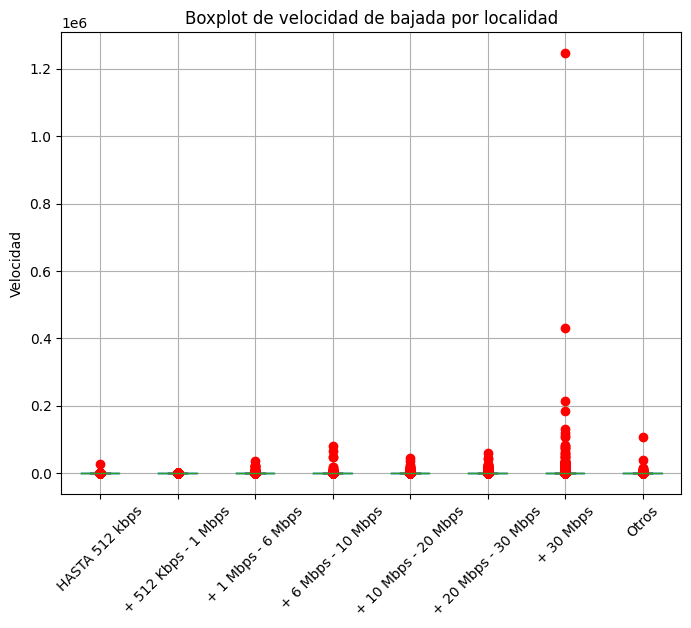

In [83]:
plt.figure(figsize=(8,6))
df_accesos_por_loc.boxplot(column=['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'Otros'], sym='ro')
plt.title('Boxplot de velocidad de bajada por localidad')
plt.xticks(rotation=45)
plt.ylabel('Velocidad')

plt.show()

Vemos que existen varios valores atipicos, principalmente en la columna '+ 30 Mbps', por lo que decidimos revisar

In [84]:
data = df_accesos_por_loc[['+ 30 Mbps']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_accesos_por_loc[outliers]
registros_con_outliers = registros_con_outliers.sort_values(by='+ 30 Mbps', ascending=False)
registros_con_outliers

,Provincia,Partido,Localidad,Otros,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps
711,Caba,Ciudad Autónoma De Buenos Aires,Ciudad Autónoma De Buenos Aires,511.0,516.0,1307.0,35109.0,64653.0,36336.0,61172.0,1246061.0
953,Cordoba,Capital,Córdoba,75.0,20.0,33.0,23573.0,19917.0,18733.0,1624.0,430151.0
2766,Santa Fe,Rosario,Rosario,37.0,9.0,2.0,20210.0,82314.0,12000.0,703.0,214188.0
264,Buenos Aires,General Pueyrredón,Mar Del Plata,16.0,37.0,367.0,4687.0,3760.0,9946.0,44422.0,183498.0
367,Buenos Aires,La Plata,La Plata,145.0,68.0,757.0,7273.0,4557.0,4530.0,40848.0,132263.0
...,...,...,...,...,...,...,...,...,...,...,...
1266,Cordoba,Tercero Arriba,Hernando,3.0,0.0,0.0,2508.0,746.0,125.0,0.0,3.0
531,Buenos Aires,Pila,Pila,0.0,0.0,0.0,11.0,19.0,31.0,10.0,3.0
2720,Santa Fe,Las Colonias,Humboldt,0.0,0.0,0.0,216.0,201.0,69.0,1.0,3.0
820,Chaco,General Güemes,Miraflores,0.0,0.0,0.0,305.0,145.0,173.0,4.0,3.0


Como era de esperarse, el mayor valor atipico corresponde a la Ciudad Autonoma de Buenos Aires, seguido por Cordoba Capital y Rosario. Esto puede deberse, como dijimos anteriormente a la densidad poblacional, el mayor desarrollo economico y de educacion, a una mejor infraestructura de telecomunicaciones, al acceso a los servicios de banda ancha y/o a la demanda y adopcion en la tecnologia por parte, no solo de la urbanizacion, sino que tambien a la concentracion de empresas y servicios radicados alli. 

# Internet_Accesos_por_tecno_por_loc

En este archivo .xlsx encontramos la siguiente hoja de calculo:

- Accesos_tecnologia_localidad: Encontramos informacion acerca de la cantidad de accesos segun la localidad y segun la tecnologia utilizada.

In [85]:
df_accesos_por_loc_y_tecno = pd.read_excel('./Sources/8- Internet-Accesos-por-tecno_por_loc.xlsx', sheet_name='Accesos_tecnologia_localidad')

In [86]:
df_accesos_por_loc_y_tecno

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,4542,0,3,0,852,0,706,6977
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,0,31,0,3733,0,0,0,0,3764
3133,TUCUMAN,Trancas,San Pedro de Colalao,90112020,0,0,0,0,0,0,0,313,313
3134,TUCUMAN,Trancas,Villa de Trancas,90112030,126,0,0,0,33,0,0,101,260
3135,TUCUMAN,Yerba Buena,Villa Carmela,90119020,1499,0,0,0,1,0,0,97,1597


Eliminamos las columnas que no vamos a utilizar en nuestro analisis.

- Link Indec
- Total general

In [87]:
df_accesos_por_loc_y_tecno = df_accesos_por_loc_y_tecno.drop(columns=['Link Indec', 'Total general'])

Capitalizamos las palabras de las columnas de provincia, partido y localidad. 

In [88]:
df_accesos_por_loc_y_tecno['Provincia'] = df_accesos_por_loc_y_tecno['Provincia'].str.title()
df_accesos_por_loc_y_tecno['Partido'] = df_accesos_por_loc_y_tecno['Partido'].str.title()
df_accesos_por_loc_y_tecno['Localidad'] = df_accesos_por_loc_y_tecno['Localidad'].str.title()

## EDA 

Revisamos si hay valores faltantes o nulos

In [89]:
df_accesos_por_loc_y_tecno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Provincia     3137 non-null   object
 1   Partido       3137 non-null   object
 2   Localidad     3137 non-null   object
 3   ADSL          3137 non-null   int64 
 4   CABLEMODEM    3137 non-null   int64 
 5   DIAL UP       3137 non-null   int64 
 6   FIBRA OPTICA  3137 non-null   int64 
 7   OTROS         3137 non-null   int64 
 8   SATELITAL     3137 non-null   int64 
 9   WIMAX         3137 non-null   int64 
 10  WIRELESS      3137 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 269.7+ KB


Revisamos si hay registros duplicados

In [90]:
df_accesos_por_loc_y_tecno.duplicated().sum()

0

Revisamos los valores atipicos o outliers

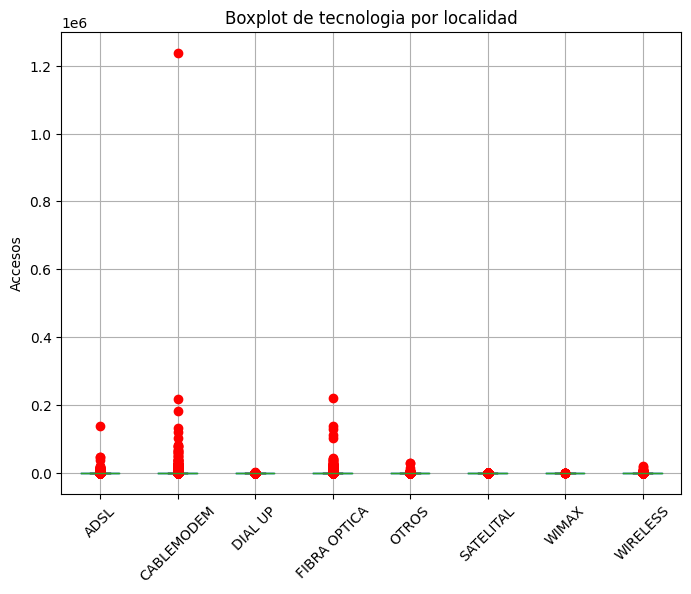

In [91]:
plt.figure(figsize=(8,6))
df_accesos_por_loc_y_tecno.boxplot(column=['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS'], sym='ro')
plt.title('Boxplot de tecnologia por localidad')
plt.xticks(rotation=45)
plt.ylabel('Accesos')

plt.show()

Nos disponemos a investigar los valores atipicos de las columnas ADLS, CABLEMODEM y FIBRA OPTICA ya que vemos que son las que mayores registros tienen de outliers

In [92]:
data = df_accesos_por_loc_y_tecno[['ADSL']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_accesos_por_loc_y_tecno[outliers]
registros_con_outliers = registros_con_outliers.sort_values(by='ADSL', ascending=False)
registros_con_outliers

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS
713,Caba,Ciudad Autónoma De Buenos Aires,Ciudad Autónoma De Buenos Aires,138753,1238196,2145,138548,29586,95,0,4603
953,Cordoba,Capital,Córdoba,47778,218599,44,222066,1218,11,0,4270
3074,Tucuman,Capital,San Miguel De Tucumán (Est. Tucumán),46392,19632,30,129584,338,15,0,504
2803,Santa Fe,Rosario,Rosario,37272,183452,74,104073,218,1,0,5228
871,Chubut,Escalante,Comodoro Rivadavia,19602,13126,248,1739,336,43,0,16687
...,...,...,...,...,...,...,...,...,...,...,...
2244,Rio Negro,San Antonio,Las Grutas,293,0,2,1746,0,16,0,0
368,Buenos Aires,La Plata,Ruta Del Sol,292,0,0,0,0,0,0,0
868,Chubut,Cushamen,Lago Puelo,290,0,0,134,0,0,0,729
699,Buenos Aires,Vicente López,Vicente López,288,9696,3,3490,17,0,0,1


In [93]:
data = df_accesos_por_loc_y_tecno[['CABLEMODEM']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_accesos_por_loc_y_tecno[outliers]
registros_con_outliers = registros_con_outliers.sort_values(by='CABLEMODEM', ascending=False)
registros_con_outliers

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS
713,Caba,Ciudad Autónoma De Buenos Aires,Ciudad Autónoma De Buenos Aires,138753,1238196,2145,138548,29586,95,0,4603
953,Cordoba,Capital,Córdoba,47778,218599,44,222066,1218,11,0,4270
2803,Santa Fe,Rosario,Rosario,37272,183452,74,104073,218,1,0,5228
359,Buenos Aires,La Plata,La Plata,11804,131295,537,39486,805,9,0,3239
257,Buenos Aires,General Pueyrredón,Mar Del Plata,15277,119493,533,110262,567,10,0,1153
...,...,...,...,...,...,...,...,...,...,...,...
363,Buenos Aires,La Plata,Otros,0,22,0,9,0,0,0,0
383,Buenos Aires,Laprida,Laprida,0,22,0,2741,0,0,0,0
2639,Santa Fe,Castellanos,Sunchales,1065,21,1,6379,0,0,0,67
743,Catamarca,Capital,El Pantanillo,5,21,0,2,0,2,0,0


In [94]:
data = df_accesos_por_loc_y_tecno[['FIBRA OPTICA']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_accesos_por_loc_y_tecno[outliers]
registros_con_outliers = registros_con_outliers.sort_values(by='FIBRA OPTICA', ascending=False)
registros_con_outliers

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS
953,Cordoba,Capital,Córdoba,47778,218599,44,222066,1218,11,0,4270
713,Caba,Ciudad Autónoma De Buenos Aires,Ciudad Autónoma De Buenos Aires,138753,1238196,2145,138548,29586,95,0,4603
3074,Tucuman,Capital,San Miguel De Tucumán (Est. Tucumán),46392,19632,30,129584,338,15,0,504
257,Buenos Aires,General Pueyrredón,Mar Del Plata,15277,119493,533,110262,567,10,0,1153
2803,Santa Fe,Rosario,Rosario,37272,183452,74,104073,218,1,0,5228
...,...,...,...,...,...,...,...,...,...,...,...
1869,Mendoza,Guaymallén,Las Cañas,0,0,0,211,0,0,0,0
259,Buenos Aires,General Pueyrredón,Sierra De Los Padres,468,0,0,210,1,0,0,222
1035,Cordoba,Juárez Celman,Los Cisnes,2,0,0,208,0,0,0,39
2175,Rio Negro,El Cuy,Las Perlas,0,0,0,208,0,1,0,144


Como podemos ver, para los 3 casos vemos que la Ciudad Atonoma de Buenos Aires y Cordoba Capital son las localidades con mayor cantidad de accesos y luego se suma San Miguel de Tucuman, lo cual es un dato interesante a investigar por que sucede. 

# Unimos los datasets por localidad

Para esto, revisamos que registro de localidades existen en un DataFrame y en el otro no, para decidir como tratarlos.

In [95]:
not_in_loc_y_tecno = df_accesos_por_loc[~df_accesos_por_loc['Localidad'].isin(df_accesos_por_loc_y_tecno['Localidad'])]
not_in_loc = df_accesos_por_loc_y_tecno[~df_accesos_por_loc_y_tecno['Localidad'].isin(df_accesos_por_loc['Localidad'])]

In [96]:
not_in_loc_y_tecno

,Provincia,Partido,Localidad,Otros,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps
1,Buenos Aires,25 De Mayo,Agustín Mosconi,0.0,0.0,0.0,46.0,13.0,0.0,0.0,0.0
8,Buenos Aires,25 De Mayo,San Enrique,0.0,0.0,0.0,78.0,19.0,0.0,0.0,0.0
9,Buenos Aires,25 De Mayo,Valdés,0.0,0.0,0.0,35.0,131.0,0.0,0.0,0.0
154,Buenos Aires,Colón,Pearson,0.0,0.0,0.0,80.0,8.0,0.0,0.0,0.0
785,Chaco,12 De Octubre,General Capdevila,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0
1957,Mendoza,San Rafael,Villa Atuel Norte,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0
2192,Rio Negro,Pichi Mahuida,Pichi Mahuida,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
not_in_loc

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS
125,Buenos Aires,Carlos Casares,Bellocq,0,0,1,0,0,0,0,0
307,Buenos Aires,Guaminí,Garré,0,0,0,288,0,0,0,0
435,Buenos Aires,Magdalena,Atalaya,0,0,0,353,0,0,0,0
436,Buenos Aires,Magdalena,Los Naranjos,0,0,0,46,0,0,0,0
437,Buenos Aires,Magdalena,Roberto J. Payró,0,0,0,0,0,0,0,32
454,Buenos Aires,Mar Chiquita,Playa Dorada,0,0,0,0,0,0,0,98
667,Buenos Aires,Trenque Lauquen,Berutti,0,0,0,282,0,0,0,0
917,Chubut,Tehuelches,Gobernador Costa,0,0,1,0,0,0,0,0
949,Cordoba,Calamuchita,San Ignacio (Loteo Vélez Crespo),0,0,0,0,0,0,0,9
981,Cordoba,Cruz Del Eje,Canteras Quilpo,0,0,0,0,0,0,0,2


Para todos estos casos vemos que no aportan informacion de valor tanto para un DataFrame ni para el otro, por lo que decidimos eliminarlos del analisis a la hora de unirlos. 

In [98]:
df_accesos_localidades = pd.merge(df_accesos_por_loc, df_accesos_por_loc_y_tecno, on=['Provincia', 'Partido', 'Localidad'], how='inner')
df_accesos_localidades

,Provincia,Partido,Localidad,Otros,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS
0,Buenos Aires,25 De Mayo,25 De Mayo,0.0,2.0,19.0,424.0,476.0,4975.0,262.0,50.0,874,4542,0,3,0,852,0,706
1,Buenos Aires,25 De Mayo,Del Valle,0.0,1.0,0.0,181.0,10.0,0.0,0.0,0.0,181,0,0,0,10,1,0,0
2,Buenos Aires,25 De Mayo,Ernestina,0.0,0.0,0.0,66.0,0.0,0.0,0.0,0.0,66,0,0,0,0,0,0,0
3,Buenos Aires,25 De Mayo,Gobernador Ugarte,0.0,0.0,0.0,175.0,5.0,0.0,0.0,1.0,0,0,0,0,0,0,0,181
4,Buenos Aires,25 De Mayo,Lucas Monteverde,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072,Tucuman,Tafí Viejo,Villa Mariano Moreno - El Colmenar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0,31,0,3733,0,0,0,0
3073,Tucuman,Trancas,San Pedro De Colalao,0.0,0.0,0.0,0.0,313.0,0.0,0.0,0.0,0,0,0,0,0,0,0,313
3074,Tucuman,Trancas,Villa De Trancas,4.0,0.0,0.0,88.0,165.0,3.0,0.0,0.0,126,0,0,0,33,0,0,101
3075,Tucuman,Yerba Buena,Villa Carmela,0.0,0.0,0.0,470.0,1029.0,97.0,0.0,0.0,1499,0,0,0,1,0,0,97


Renombramos las columnas para estandarizar.

In [99]:
df_accesos_localidades = df_accesos_localidades.rename(columns={'Otros': 'Otras velocidades', 'OTROS': 'Otras Tecnologias'})
df_accesos_localidades.columns = [column.title() for column in df_accesos_localidades.columns]

df_accesos_localidades

,Provincia,Partido,Localidad,Otras Velocidades,Hasta 512 Kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Adsl,Cablemodem,Dial Up,Fibra Optica,Otras Tecnologias,Satelital,Wimax,Wireless
0,Buenos Aires,25 De Mayo,25 De Mayo,0.0,2.0,19.0,424.0,476.0,4975.0,262.0,50.0,874,4542,0,3,0,852,0,706
1,Buenos Aires,25 De Mayo,Del Valle,0.0,1.0,0.0,181.0,10.0,0.0,0.0,0.0,181,0,0,0,10,1,0,0
2,Buenos Aires,25 De Mayo,Ernestina,0.0,0.0,0.0,66.0,0.0,0.0,0.0,0.0,66,0,0,0,0,0,0,0
3,Buenos Aires,25 De Mayo,Gobernador Ugarte,0.0,0.0,0.0,175.0,5.0,0.0,0.0,1.0,0,0,0,0,0,0,0,181
4,Buenos Aires,25 De Mayo,Lucas Monteverde,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072,Tucuman,Tafí Viejo,Villa Mariano Moreno - El Colmenar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0,31,0,3733,0,0,0,0
3073,Tucuman,Trancas,San Pedro De Colalao,0.0,0.0,0.0,0.0,313.0,0.0,0.0,0.0,0,0,0,0,0,0,0,313
3074,Tucuman,Trancas,Villa De Trancas,4.0,0.0,0.0,88.0,165.0,3.0,0.0,0.0,126,0,0,0,33,0,0,101
3075,Tucuman,Yerba Buena,Villa Carmela,0.0,0.0,0.0,470.0,1029.0,97.0,0.0,0.0,1499,0,0,0,1,0,0,97


# mapa_conectividad

En este archivo .xlsx encontramos la siguiente hoja de calculo:

- Hoja3: encontramos informacion acerca de la poblacion de cada localidad, la latitud y longitud, y si tienen acceso a las diferentes tecnologias o no.

In [100]:
df_mapa_conectividad = pd.read_excel('./Sources/9- mapa_conectividad.xlsx', sheet_name='Hoja3')

In [101]:
df_mapa_conectividad

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,SI,--,--,--,--,--,SI,SI,SI,6588010.0,-35.292982,-61.407254
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,--,--,--,--,--,--,SI,SI,SI,6588020.0,-35.239499,-60.825136
2,BUENOS AIRES,9 de Julio,Dudignac,2670,--,--,SI,--,--,SI,SI,SI,SI,6588040.0,-35.651193,-60.709896
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),531,--,--,--,--,--,--,--,--,SI,6588050.0,-35.407947,-61.210567
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),748,SI,--,--,SI,--,--,SI,SI,SI,6588060.0,-35.520141,-60.998949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4306,BUENOS AIRES,Pilar,Pilar,86158,SI,SI,SI,SI,SI,SI,SI,SI,SI,6638040.0,-34.466332,-58.922720
4307,BUENOS AIRES,Pilar,Presidente Derqui,50783,SI,SI,--,SI,--,SI,SI,SI,SI,6638040.0,-34.492862,-58.841699
4308,BUENOS AIRES,Pilar,Roberto De Vicenzo,0,--,--,--,--,--,--,--,SI,SI,6638040.0,-34.436965,-58.766994
4309,BUENOS AIRES,Pilar,Santa Teresa,5324,--,--,--,--,SI,--,--,SI,SI,6638040.0,-34.436691,-58.757347


Encontramos que de este DataFrame los datos que nos interesan son la poblacion y la latitud y longitud, ya que todo el resto seria informacion redundante a la ya obtenida, por lo que decidimos eliminar las columnas innecesarias. 

In [102]:
df_mapa_conectividad = df_mapa_conectividad.drop(columns=['ADSL', 'Cablemódem', 'Dial Up',	'Fibra óptica',	'Satelital', 'Wireless', 'Telefonía Fija', '3G', '4G', 'Link'], axis=1)

Capitalizamos las palabras de las columnas de provincia, partido y localidad. 

In [103]:
df_mapa_conectividad['Provincia'] = df_mapa_conectividad['Provincia'].str.title()
df_mapa_conectividad['Partido'] = df_mapa_conectividad['Partido'].str.title()
df_mapa_conectividad['Localidad'] = df_mapa_conectividad['Localidad'].str.title()

## EDA

Revisamos si hay valores nulos o faltantes

In [104]:
df_mapa_conectividad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Provincia  4311 non-null   object 
 1   Partido    4311 non-null   object 
 2   Localidad  4311 non-null   object 
 3   Población  4311 non-null   int64  
 4   Latitud    4311 non-null   float64
 5   Longitud   4311 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 202.2+ KB


Revisamos si hay registros duplicados

In [105]:
df_mapa_conectividad.duplicated().sum()

1

Encontramos que hay un registro duplicado, por lo que decidimos buscarlo.

In [106]:
duplicates = df_mapa_conectividad[df_mapa_conectividad.duplicated()]
duplicates

,Provincia,Partido,Localidad,Población,Latitud,Longitud
3813,Entre Rios,Paraná,El Ramblón,0,-31.848047,-60.092749


Decidimos eliminarlo

In [107]:
df_mapa_conectividad = df_mapa_conectividad.drop_duplicates()

Podemos ver que no encontramos Caba entre las primeras ciudades con mayor poblacion por lo que decidimos investigar como esta dividida la Ciudad Autonoma de Buenos Aires en nuestro DataFrame

In [108]:
df_mapa_conectividad[df_mapa_conectividad['Provincia'] == 'Caba']

,Provincia,Partido,Localidad,Población,Latitud,Longitud
45,Caba,Comuna 12,Villa Pueyrredon,39654,-34.582110,-58.503485
269,Caba,Comuna 12,Villa Urquiza,91563,-34.571541,-58.487856
280,Caba,Comuna 13,Belgrano,126831,-34.554882,-58.450289
369,Caba,Comuna 13,Colegiales,52551,-34.574643,-58.450968
650,Caba,Comuna 13,Nuñez,51949,-34.543738,-58.462858
741,Caba,Comuna 14,Palermo,225970,-34.573900,-58.422436
838,Caba,Comuna 09,Liniers,44132,-34.643796,-58.519130
847,Caba,Comuna 09,Parque Avellaneda,53229,-34.648641,-58.476456
959,Caba,Comuna 15,Agronomia,13912,-34.592944,-58.488671
1066,Caba,Comuna 15,Chacarita,27761,-34.588373,-58.454175


Vemos que a diferencia de nuestro otro DataFrame, se divide a Caba por sus diferentes localidades y comunas. Para esta investigacion decidimos unificarlo y sumar toda la poblacion de Caba en un solo registro, al igual que en el DataFrame de accesos por localidad. 

Primero agrupamos todos los registros que tengan como Provincia == 'Caba'

In [109]:
caba_agrupada = df_mapa_conectividad[df_mapa_conectividad['Provincia'] == 'Caba'].groupby(['Provincia'])['Población'].sum().reset_index()
caba_agrupada

,Provincia,Población
0,Caba,2890151


Decidimos seleccionar como latitud y longitus el primer registro que encuentre que esta relacionado con Caba

In [110]:
latitud = df_mapa_conectividad[df_mapa_conectividad['Provincia'] == 'Caba']['Latitud'].iloc[0]
longitud = df_mapa_conectividad[df_mapa_conectividad['Provincia'] == 'Caba']['Longitud'].iloc[0]

Creamos un nuevo DataFrame, al cual le indicamos como queremos nombrar el resto de las columnas.

In [111]:
nuevo_df = pd.DataFrame({
    'Provincia': 'Caba',
    'Partido': 'Ciudad Autónoma De Buenos Aires',
    'Localidad': 'Ciudad Autónoma De Buenos Aires',
    'Población': caba_agrupada['Población'],
    'Latitud': latitud,
    'Longitud': longitud
})
nuevo_df

,Provincia,Partido,Localidad,Población,Latitud,Longitud
0,Caba,Ciudad Autónoma De Buenos Aires,Ciudad Autónoma De Buenos Aires,2890151,-34.58211,-58.503485


Concatenamos este nuevo DataFrame con el original, eliminando los registros que anteriormente indicaban Caba y reseteamos los indices

In [112]:
df_mapa_conectividad = pd.concat([nuevo_df, df_mapa_conectividad[df_mapa_conectividad['Provincia'] != 'Caba']])
df_mapa_conectividad.reset_index(drop=True, inplace=True)

In [113]:
df_mapa_conectividad[df_mapa_conectividad['Provincia'] == 'Caba']

,Provincia,Partido,Localidad,Población,Latitud,Longitud
0,Caba,Ciudad Autónoma De Buenos Aires,Ciudad Autónoma De Buenos Aires,2890151,-34.58211,-58.503485


Analizamos los valor atipicos o outliers

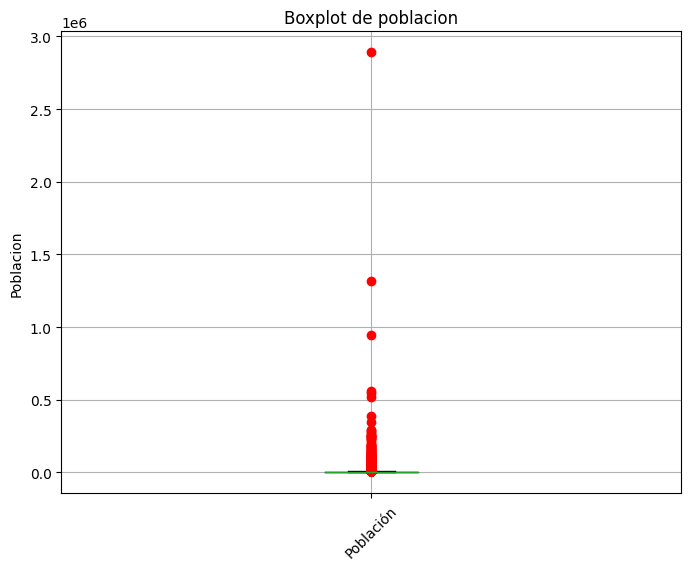

In [114]:
plt.figure(figsize=(8,6))
df_mapa_conectividad.boxplot(column=['Población'], sym='ro')
plt.title('Boxplot de poblacion')
plt.xticks(rotation=45)
plt.ylabel('Poblacion')

plt.show()

Buscamos esos registros.

In [115]:
data = df_mapa_conectividad[['Población']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_mapa_conectividad[outliers]
registros_con_outliers = registros_con_outliers.sort_values(by='Población', ascending=False)
registros_con_outliers

,Provincia,Partido,Localidad,Población,Latitud,Longitud
0,Caba,Ciudad Autónoma De Buenos Aires,Ciudad Autónoma De Buenos Aires,2890151,-34.582110,-58.503485
1223,Cordoba,Capital,Córdoba,1317298,-31.413817,-64.183338
3673,Santa Fe,Rosario,Rosario,948312,-32.953814,-60.651538
28,Buenos Aires,General Pueyrredón,Mar Del Plata,560913,-38.012091,-57.606495
2748,Tucuman,Capital,San Miguel De Tucumán (Est. Tucumán),548866,-26.829010,-65.210544
...,...,...,...,...,...,...
2326,La Pampa,Realicó,Realicó,7343,-35.036886,-64.245421
391,Chaco,Fray Justo Santa María De Oro,Santa Sylvina,7340,-27.835601,-61.136174
417,Cordoba,Unión,Monte Maíz,7325,-33.204562,-62.601248
2312,Corrientes,San Roque,San Roque,7323,-28.573231,-58.710057


Como podiamos intuir por lo visto a lo largo de todo el analisis, la mayor concentracion de poblacion se ubica en la Ciudad Autonoma de Buenos Aires, en Cordoba Capital y Rosario.

# Unimos el dataset al de localidades

Para esto volvemos a revisar que registros podemos observar que no coinciden con el dataset anterior para analizar como tratarlos.

In [116]:
not_in_mapa = df_accesos_localidades[~df_accesos_localidades['Localidad'].isin(df_mapa_conectividad['Localidad'])]
not_in_localidades = df_mapa_conectividad[~df_mapa_conectividad['Localidad'].isin(df_accesos_localidades['Localidad'])]

In [117]:
not_in_mapa

,Provincia,Partido,Localidad,Otras Velocidades,Hasta 512 Kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Adsl,Cablemodem,Dial Up,Fibra Optica,Otras Tecnologias,Satelital,Wimax,Wireless
9,Buenos Aires,9 De Julio,Alfredo Demarchi (Est. Facundo Quiroga),0.0,0.0,0.0,510.0,0.0,0.0,0.0,0.0,450,0,0,0,60,0,0,0
11,Buenos Aires,9 De Julio,Manuel B. Gonnet (Est. French),0.0,0.0,0.0,201.0,2.0,0.0,0.0,0.0,199,0,0,2,2,0,0,0
13,Buenos Aires,9 De Julio,Villa General Fournier (Est. 9 De Julio Sud),118.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0,0,0,118,0,0,0,42
19,Buenos Aires,Adolfo Gonzales Chaves,Adolfo Gonzales Chaves (Est. Chaves),0.0,0.0,3.0,147.0,569.0,1046.0,44.0,1.0,549,0,2,943,0,0,0,313
23,Buenos Aires,Alberti,Alberti (Est. Andrés Vaccarezza),0.0,0.0,2.0,51.0,116.0,302.0,0.0,1.0,457,0,6,1,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963,Santiago Del Estero,Ojo De Agua,Otros,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,4,0,0
2966,Santiago Del Estero,Otros,Otros,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,310,0,0,0
3011,Tucuman,Burruyacú,Otros,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0
3055,Tucuman,Otros,Otros,381.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,0,0,0,0,9,0,0,0


In [118]:
not_in_mapa

,Provincia,Partido,Localidad,Otras Velocidades,Hasta 512 Kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Adsl,Cablemodem,Dial Up,Fibra Optica,Otras Tecnologias,Satelital,Wimax,Wireless
9,Buenos Aires,9 De Julio,Alfredo Demarchi (Est. Facundo Quiroga),0.0,0.0,0.0,510.0,0.0,0.0,0.0,0.0,450,0,0,0,60,0,0,0
11,Buenos Aires,9 De Julio,Manuel B. Gonnet (Est. French),0.0,0.0,0.0,201.0,2.0,0.0,0.0,0.0,199,0,0,2,2,0,0,0
13,Buenos Aires,9 De Julio,Villa General Fournier (Est. 9 De Julio Sud),118.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0,0,0,118,0,0,0,42
19,Buenos Aires,Adolfo Gonzales Chaves,Adolfo Gonzales Chaves (Est. Chaves),0.0,0.0,3.0,147.0,569.0,1046.0,44.0,1.0,549,0,2,943,0,0,0,313
23,Buenos Aires,Alberti,Alberti (Est. Andrés Vaccarezza),0.0,0.0,2.0,51.0,116.0,302.0,0.0,1.0,457,0,6,1,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963,Santiago Del Estero,Ojo De Agua,Otros,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,4,0,0
2966,Santiago Del Estero,Otros,Otros,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,310,0,0,0
3011,Tucuman,Burruyacú,Otros,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0
3055,Tucuman,Otros,Otros,381.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,0,0,0,0,9,0,0,0


Decidimos eliminar los registros que no puedan vincularse y procedemos a unir los datos.

In [119]:
df_accesos_localidades = pd.merge(df_accesos_localidades, df_mapa_conectividad, on=['Provincia', 'Partido', 'Localidad'], how='inner')
df_accesos_localidades

,Provincia,Partido,Localidad,Otras Velocidades,Hasta 512 Kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,...,Cablemodem,Dial Up,Fibra Optica,Otras Tecnologias,Satelital,Wimax,Wireless,Población,Latitud,Longitud
0,Buenos Aires,25 De Mayo,25 De Mayo,0.0,2.0,19.0,424.0,476.0,4975.0,262.0,...,4542,0,3,0,852,0,706,23408,-35.433939,-60.173121
1,Buenos Aires,25 De Mayo,Del Valle,0.0,1.0,0.0,181.0,10.0,0.0,0.0,...,0,0,0,10,1,0,0,899,-35.897345,-60.731609
2,Buenos Aires,25 De Mayo,Ernestina,0.0,0.0,0.0,66.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,145,-35.270234,-59.557503
3,Buenos Aires,25 De Mayo,Gobernador Ugarte,0.0,0.0,0.0,175.0,5.0,0.0,0.0,...,0,0,0,0,0,0,181,547,-35.164397,-60.081358
4,Buenos Aires,25 De Mayo,Lucas Monteverde,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0,0,0,0,0,0,6,63,-35.483827,-59.988065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964,Tucuman,Tafí Viejo,Tafí Viejo,0.0,0.0,0.0,1340.0,3108.0,1689.0,53.0,...,632,0,7283,11,0,0,8,39601,-26.731268,-65.255818
2965,Tucuman,Tafí Viejo,Villa Mariano Moreno - El Colmenar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31,0,3733,0,0,0,0,52960,-26.775982,-65.201970
2966,Tucuman,Trancas,San Pedro De Colalao,0.0,0.0,0.0,0.0,313.0,0.0,0.0,...,0,0,0,0,0,0,313,3065,-26.235765,-65.493852
2967,Tucuman,Yerba Buena,Villa Carmela,0.0,0.0,0.0,470.0,1029.0,97.0,0.0,...,0,0,0,1,0,0,97,14728,-26.767775,-65.270844


In [120]:
df_accesos_localidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2969 entries, 0 to 2968
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Provincia            2969 non-null   object 
 1   Partido              2969 non-null   object 
 2   Localidad            2969 non-null   object 
 3   Otras Velocidades    2969 non-null   float64
 4   Hasta 512 Kbps       2969 non-null   float64
 5   + 512 Kbps - 1 Mbps  2969 non-null   float64
 6   + 1 Mbps - 6 Mbps    2969 non-null   float64
 7   + 6 Mbps - 10 Mbps   2969 non-null   float64
 8   + 10 Mbps - 20 Mbps  2969 non-null   float64
 9   + 20 Mbps - 30 Mbps  2969 non-null   float64
 10  + 30 Mbps            2969 non-null   float64
 11  Adsl                 2969 non-null   int64  
 12  Cablemodem           2969 non-null   int64  
 13  Dial Up              2969 non-null   int64  
 14  Fibra Optica         2969 non-null   int64  
 15  Otras Tecnologias    2969 non-null   i

Descargamos el DataFrame en un archivo CSV

In [121]:
df_accesos_localidades.to_csv('accesos_localidades.csv', index=False)